## Sample EDA - Omdena IPAGE

###Direct doc --> [LINK](https://docs.google.com/document/d/1CxhxAiQFBzCLkQ6J891WE2PaGo9eBRkKTm-mjAR3Pwk/edit?usp=sharing)

In [107]:
!gdown --id 1bwQyhW4bPA04sPy8JppZft_sM8O-j-DK06UDYR813Ik

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bwQyhW4bPA04sPy8JppZft_sM8O-j-DK06UDYR813Ik
From (redirected): https://docs.google.com/spreadsheets/d/1bwQyhW4bPA04sPy8JppZft_sM8O-j-DK06UDYR813Ik/export?format=xlsx
To: /2410_iPAGE_SoilData.xlsx
88.3kB [00:00, 67.5MB/s]


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import MaxNLocator
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_excel("/2410_iPAGE_SoilData.xlsx")
df.head()

Area  Data Collection Year soil group   Land class knit (surface)  \
0  Mithpukur                  2005      belab  high ground     Clay loam    
1  Mithpukur                  2005      belab  high ground     Clay loam    
2  Mithpukur                  2005      belab  high ground     Clay loam    
3  Mithpukur                  2005      belab  high ground     Clay loam    
4  Mithpukur                  2005      belab  high ground     Clay loam    

    pH  SOC (%) Nitrogen N (%) Potassium K (meq/100) Phosphorus P (ug/g)  \
0  5.0     1.27           0.08                  0.15                19.6   
1  4.9     1.47           0.09                  0.25                 4.1   
2  4.6     1.07           0.05                  0.09                13.3   
3  5.2     1.51           0.06                  0.30                20.2   
4  5.3     1.08           0.11                  0.17                20.5   

  Sulfur S (ug/g) Boron B (ug/g) Zinc Zn (ug/g)  
0            37.7           0.26           0.86  
1            32.0           0.25           0.75  
2            13.5           0.27           0.95  
3            30.0           0.28            1.0  
4            27.8           0.30           1.04

In [ ]:
df.columns

Index(['Area', 'Data Collection Year', 'soil group', 'Land class',
       'knit (surface)', 'pH', 'SOC (%)', 'Nitrogen N (%)',
       'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
       'Boron B (ug/g)', 'Zinc Zn (ug/g)'],
      dtype='object')

In [112]:
df.isna().sum()

Area                       0
Data Collection Year       0
soil group                 0
Land class                 0
knit (surface)           157
pH                         0
SOC (%)                    0
Nitrogen N (%)             0
Potassium K (meq/100)      0
Phosphorus P (ug/g)        0
Sulfur S (ug/g)            0
Boron B (ug/g)             0
Zinc Zn (ug/g)             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   Data Collection Year   618 non-null    int64  
 2   soil group             618 non-null    object 
 3   Land class             618 non-null    object 
 4   knit (surface)         461 non-null    object 
 5   pH                     618 non-null    object 
 6   SOC (%)                618 non-null    float64
 7   Nitrogen N (%)         618 non-null    object 
 8   Potassium K (meq/100)  618 non-null    object 
 9   Phosphorus P (ug/g)    618 non-null    object 
 10  Sulfur S (ug/g)        618 non-null    object 
 11  Boron B (ug/g)         618 non-null    object 
 12  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 62.9+ KB


In [139]:
for i in ['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)','Zinc Zn (ug/g)']:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [115]:
df['knit (surface)']= df['knit (surface)'].fillna("NA")

In [ ]:
df.isna().sum()

Area                     0
Data Collection Year     0
soil group               0
Land class               0
knit (surface)           0
pH                       0
SOC (%)                  0
Nitrogen N (%)           0
Potassium K (meq/100)    0
Phosphorus P (ug/g)      0
Sulfur S (ug/g)          0
Boron B (ug/g)           0
Zinc Zn (ug/g)           0
dtype: int64

In [ ]:
df.describe().T

count         mean        std        min        25%  \
Data Collection Year   618.0  2004.050162   7.103021  1990.0000  1997.0000   
pH                     616.0     5.237549   0.470375     4.1000     4.9000   
SOC (%)                618.0     1.792214   1.034159     0.1000     1.3525   
Nitrogen N (%)         610.0     0.113299   0.510417     0.0002     0.0700   
Potassium K (meq/100)  616.0     0.459870   3.385685     0.0000     0.1100   
Phosphorus P (ug/g)    616.0    31.138442  38.094037     0.0600     8.7950   
Sulfur S (ug/g)        617.0    15.343173  11.070897     0.4000     8.6700   
Boron B (ug/g)         591.0     0.421151   1.406557     0.0600     0.2400   
Zinc Zn (ug/g)         617.0     1.040292   0.976552     0.0800     0.5200   

                           50%        75%      max  
Data Collection Year   2005.00  2005.0000  2016.00  
pH                        5.20     5.4000     7.80  
SOC (%)                   1.70     2.1600    20.40  
Nitrogen N (%)            0.09     0.1100    12.60  
Potassium K (meq/100)     0.17     0.2825    68.00  
Phosphorus P (ug/g)      16.00    37.5000   254.70  
Sulfur S (ug/g)          12.60    19.0000    85.00  
Boron B (ug/g)            0.30     0.4100    34.00  
Zinc Zn (ug/g)            0.82     1.1000    10.58

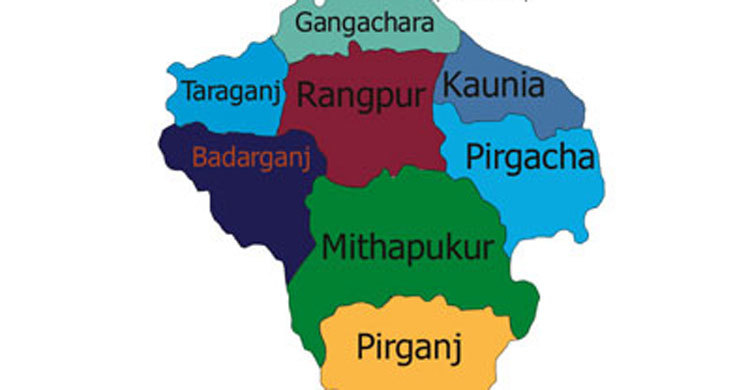

- **Taraganj Thana** and **Gangachara** are located far from the other 3 --> Putting any knit value by imputer or clustering can be dangerous

- **Clay Loam**: Contains about 20-30% clay, with a more balanced loamy texture.
- **Loam Clay**: Contains over 30% clay, giving it a denser, more clayey texture.

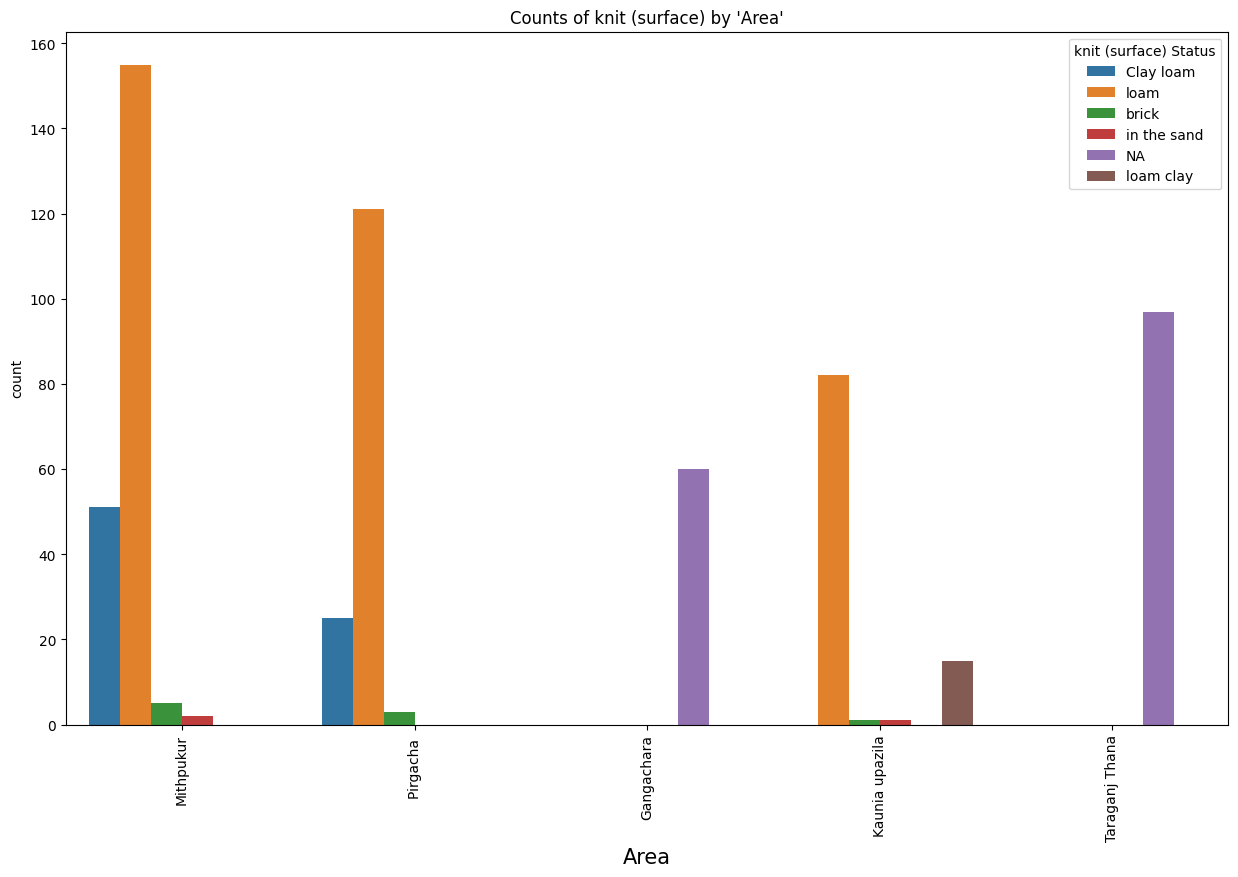

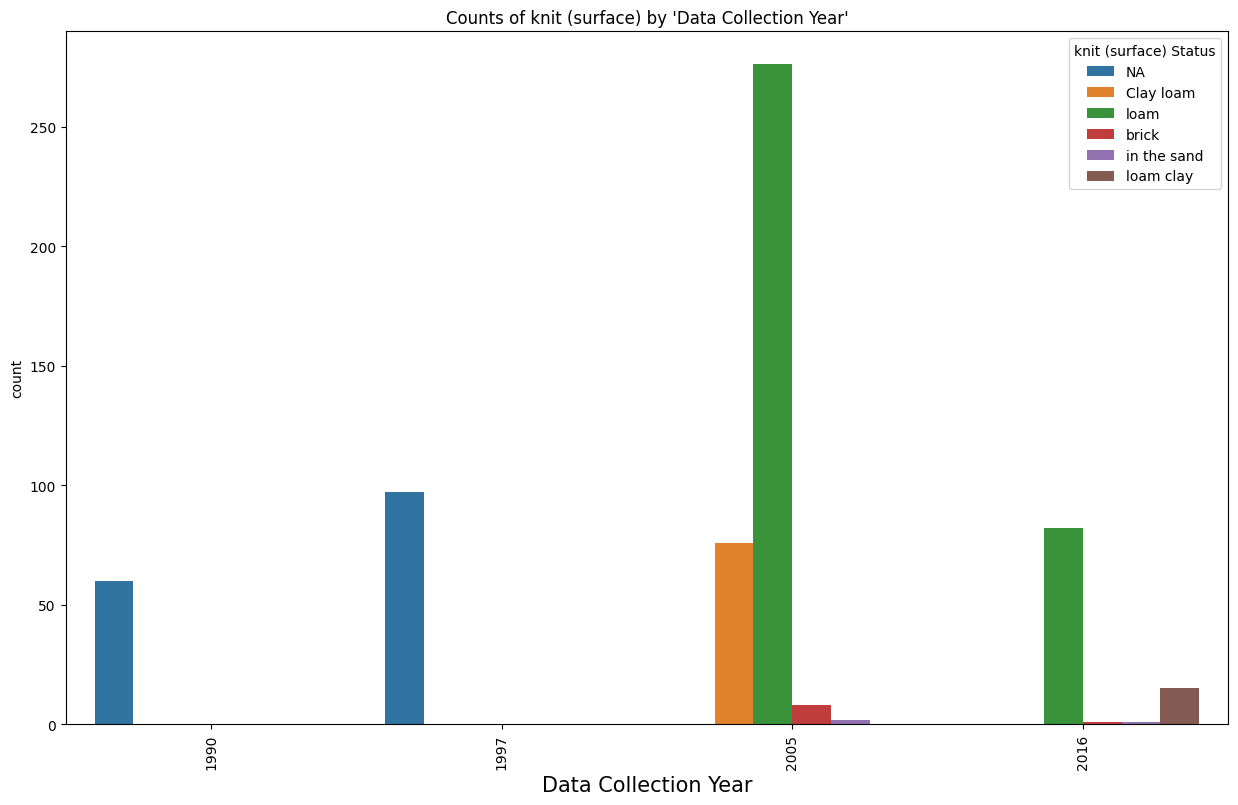

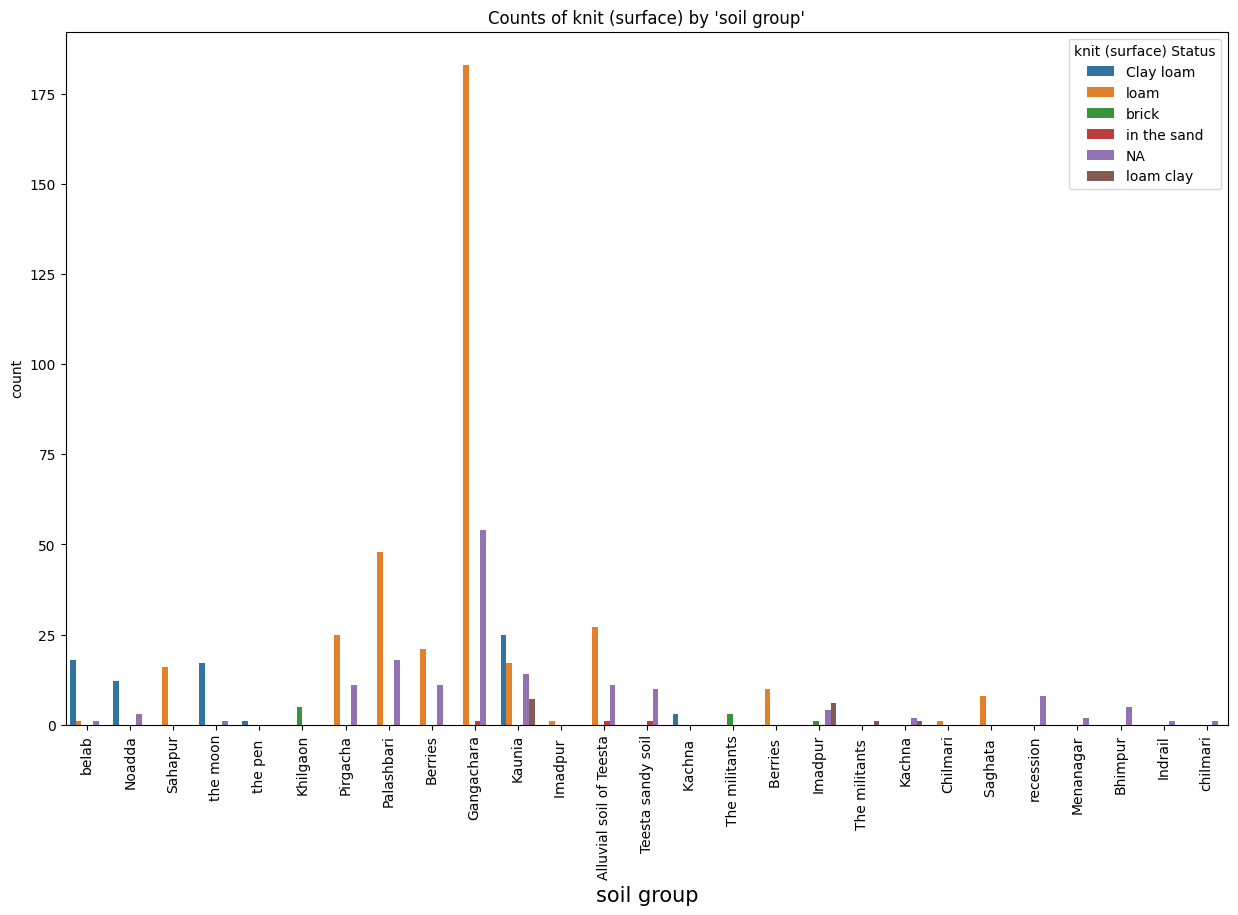

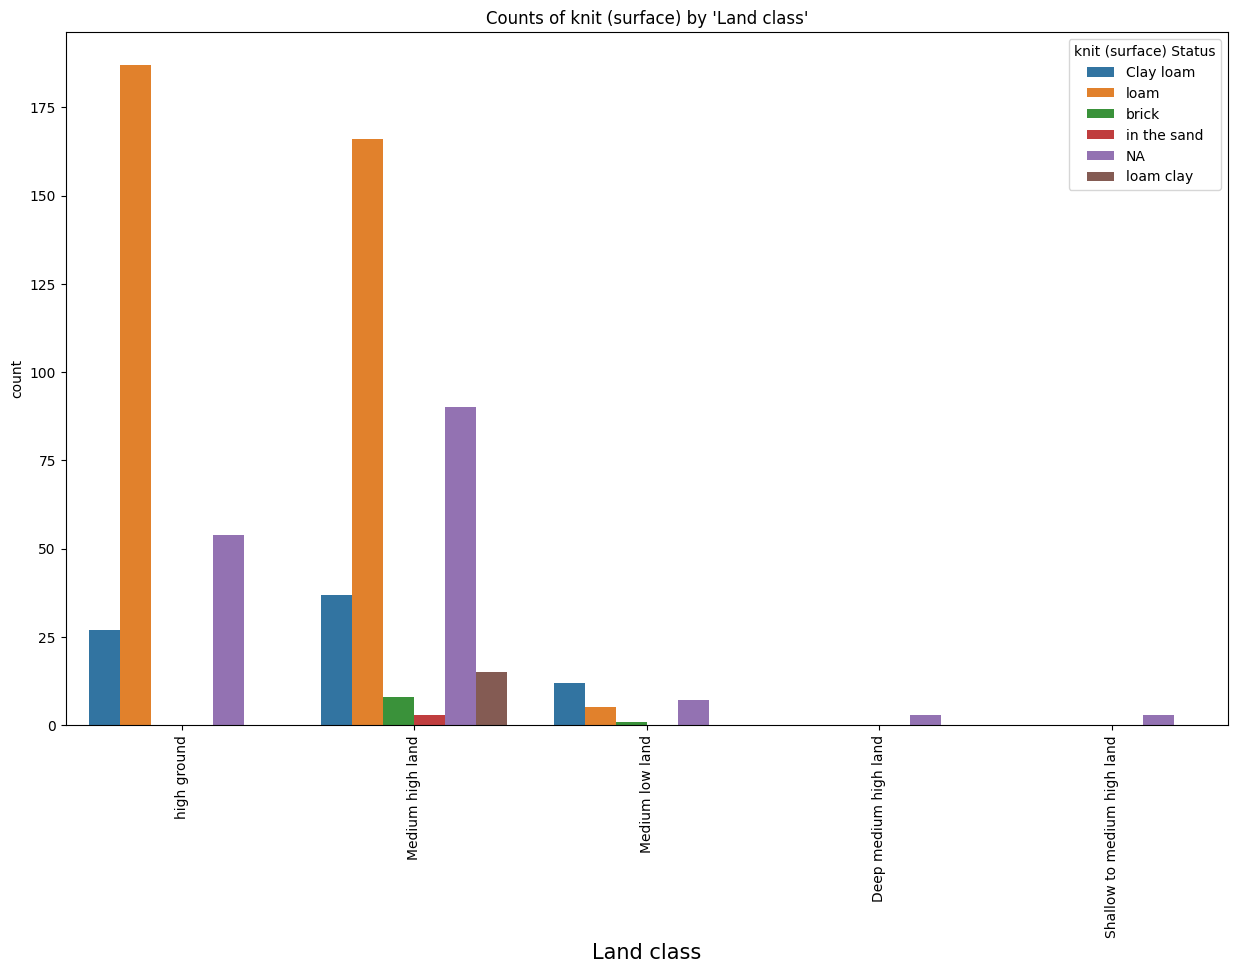

In [ ]:
for col in df.columns[:4]:
    plt.figure(figsize=(15, 9))
    sns.countplot(data=df, x=col, hue='knit (surface)')
    plt.title(f"Counts of knit (surface) by '{col}'")
    plt.xlabel(col, fontsize=15)
    plt.xticks(rotation=90)
    plt.legend(title="knit (surface) Status")
    plt.show()
    print('\n')

### OUTLIER

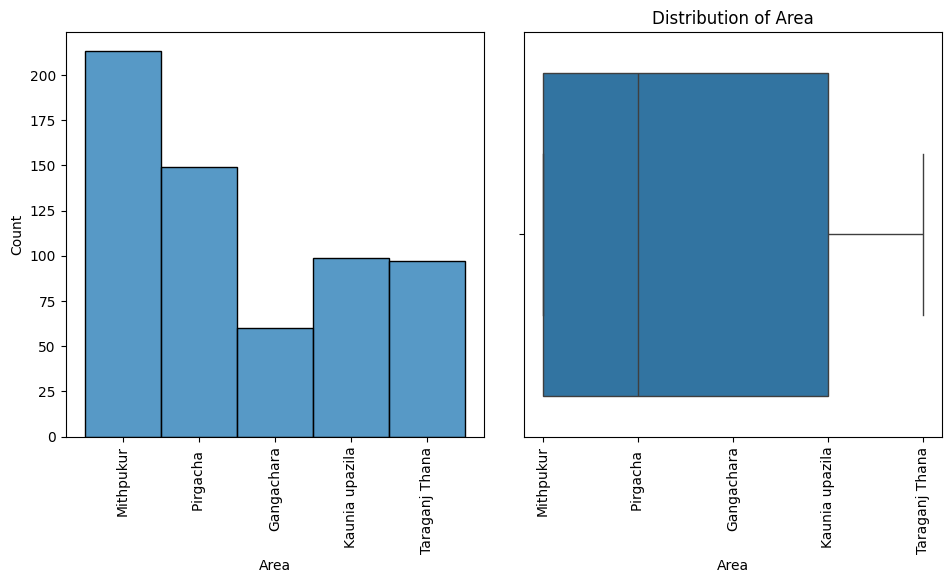

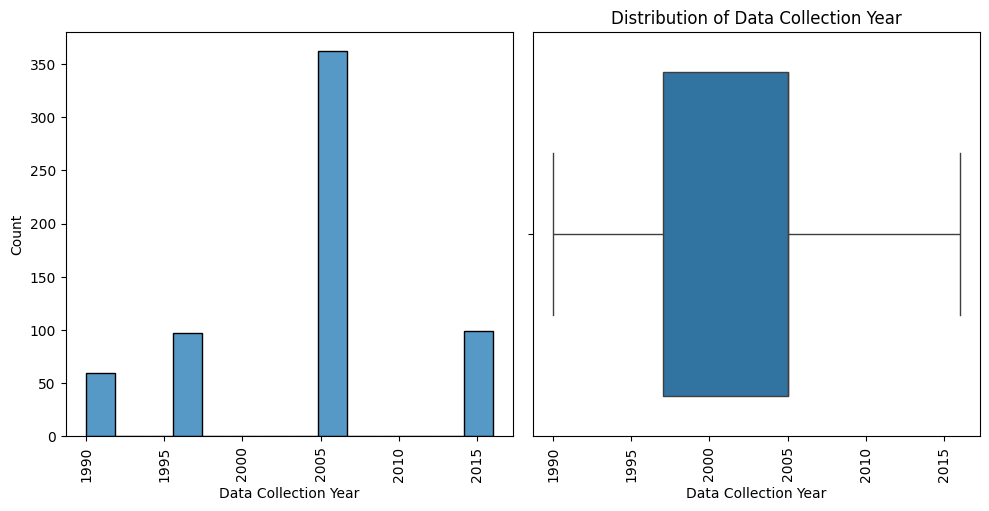

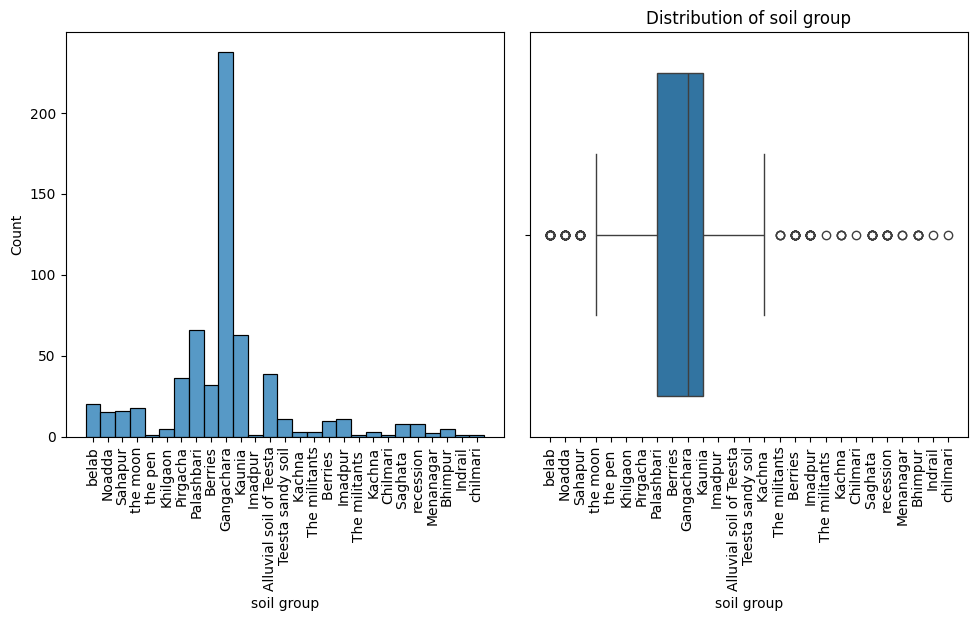

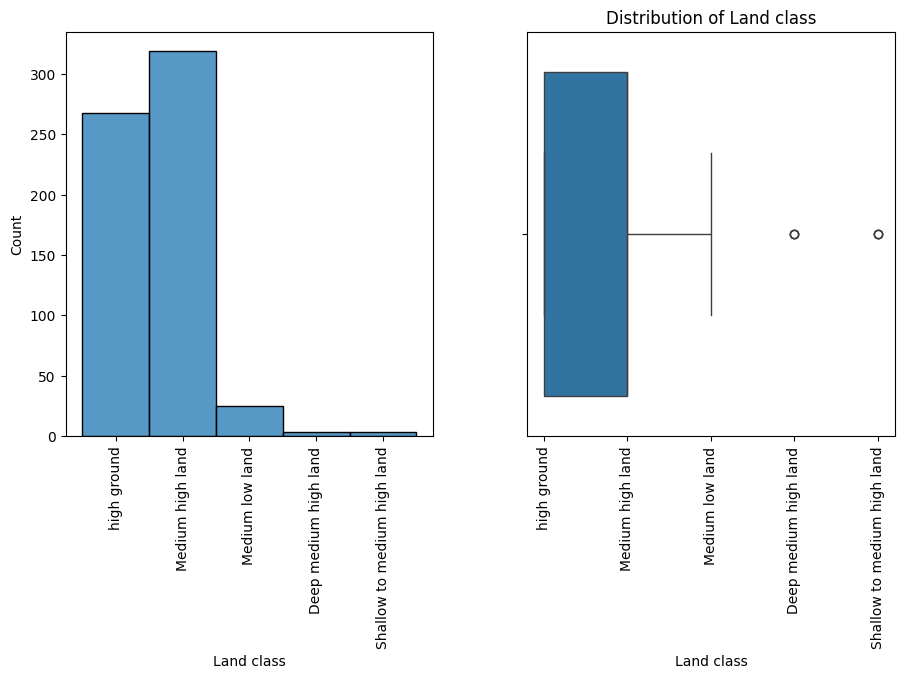

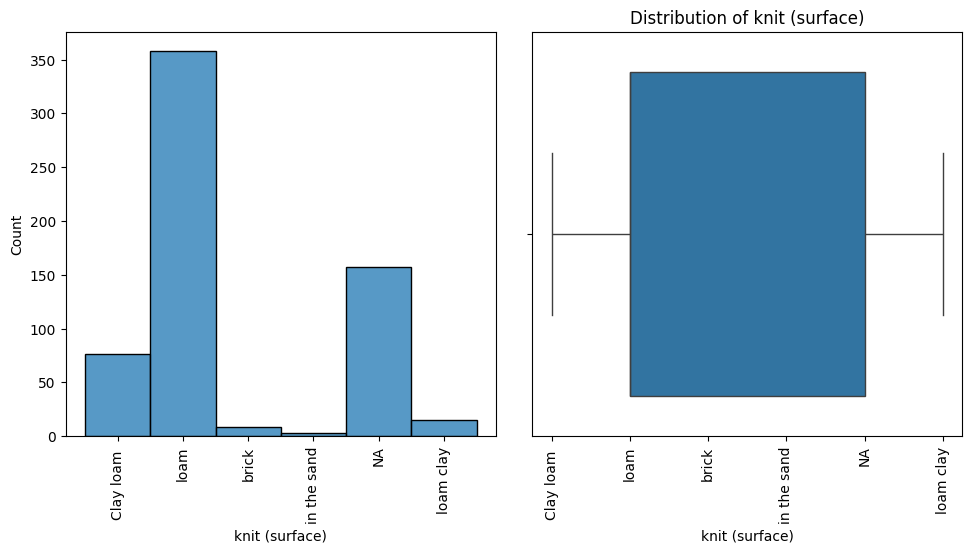

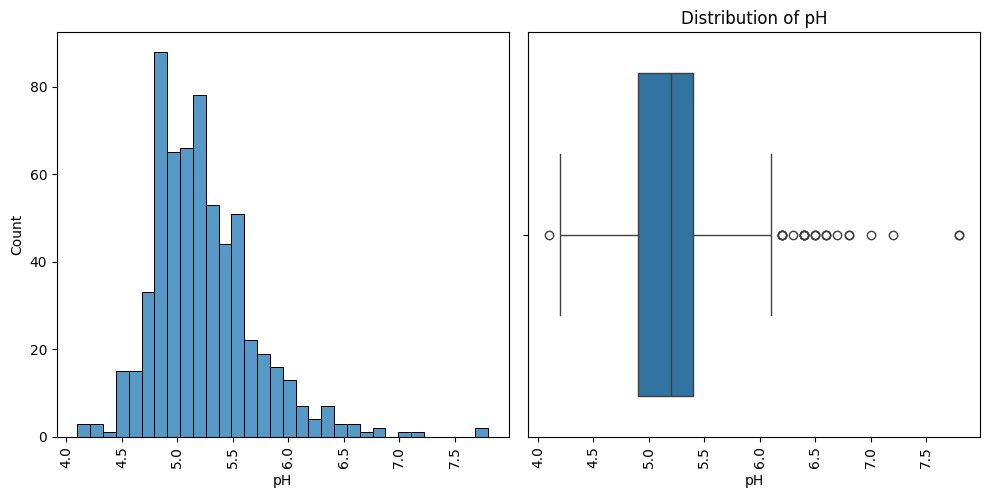

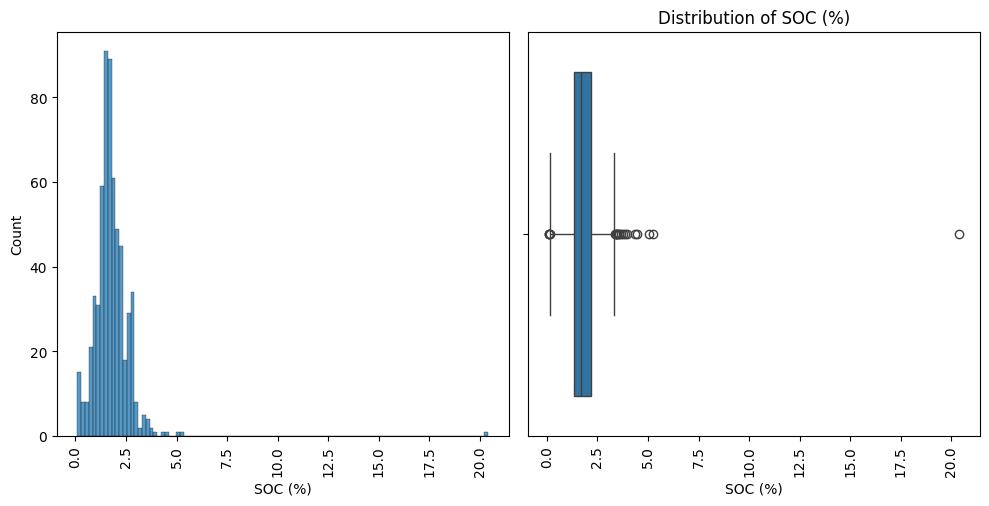

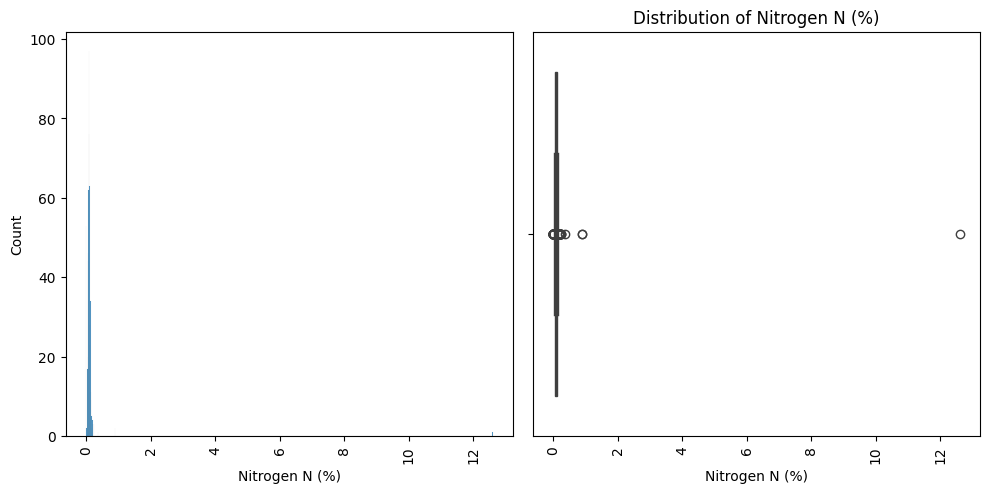

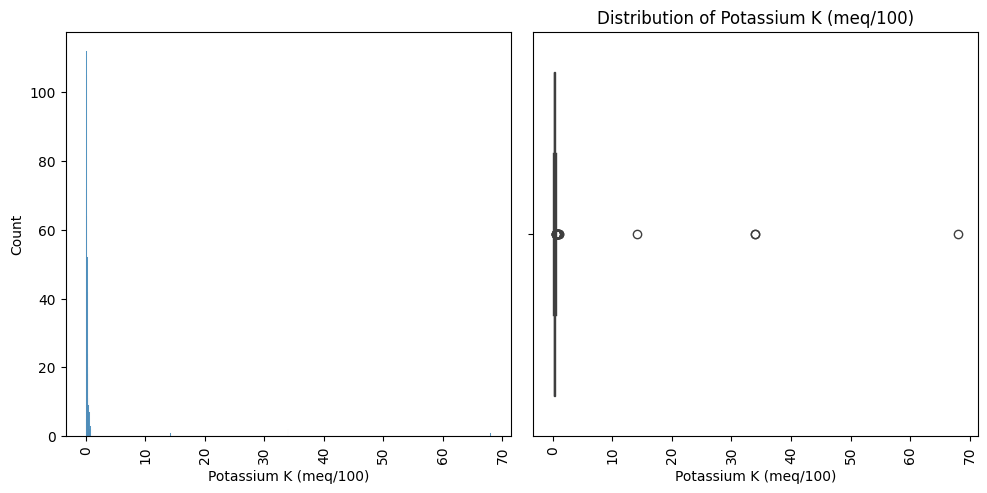

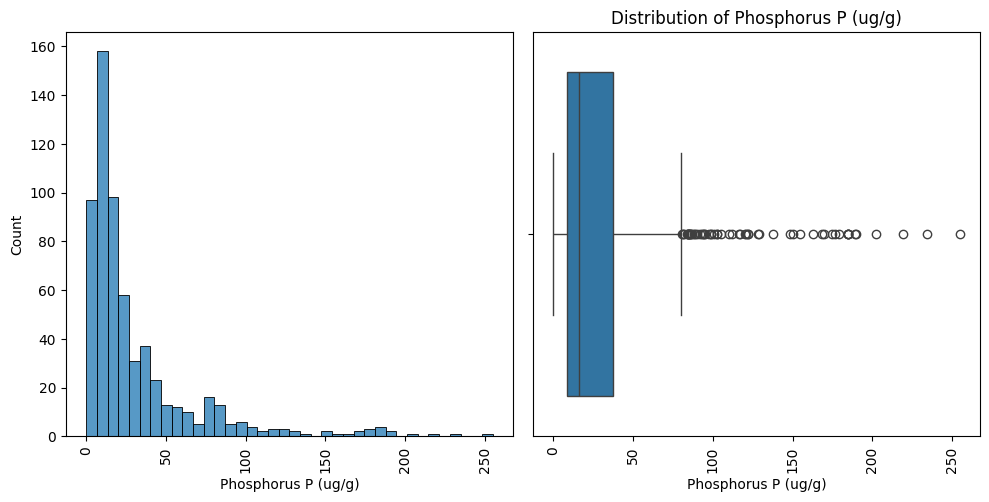

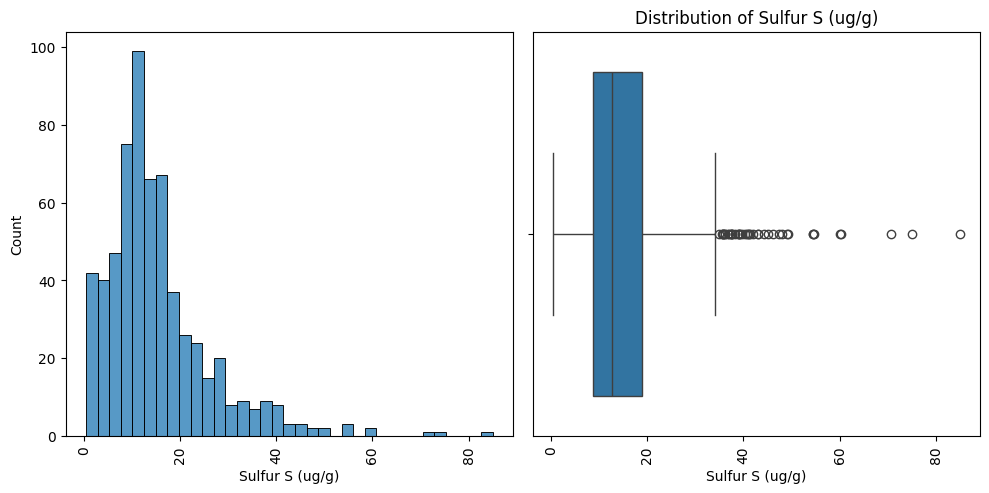

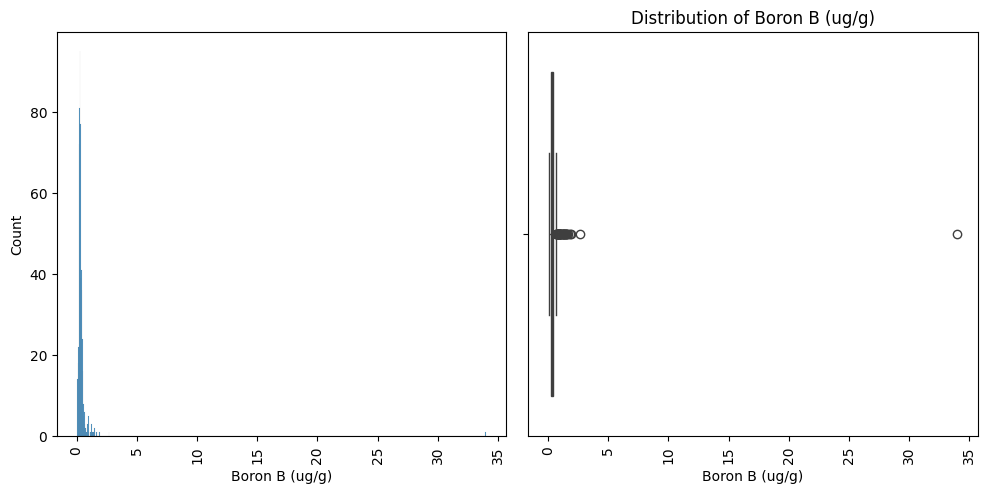

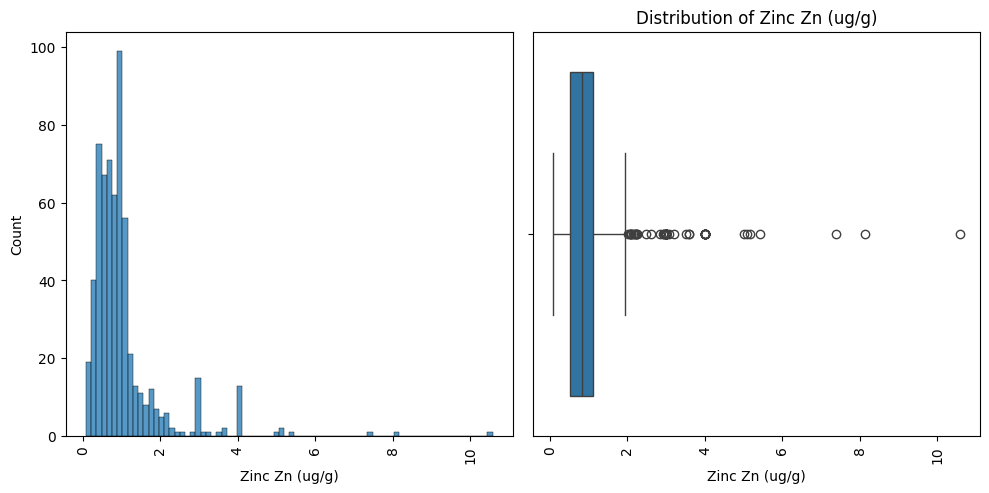

In [ ]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(df[col], ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    for ax in axes:
        ax.tick_params(axis='x', rotation=90)
    plt.show()
    print('\n')

# Corralation with outliers

In [123]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))

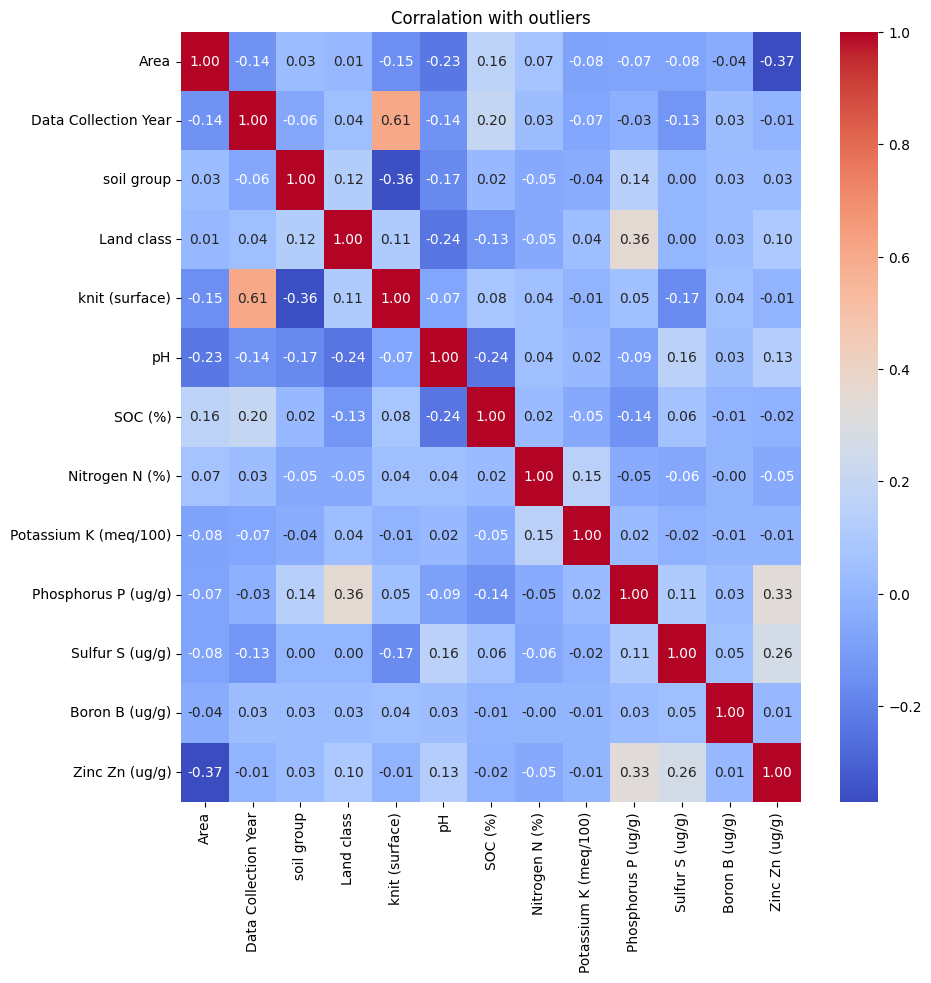

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Corralation with outliers")
plt.show()

# Corralation without outliers

In [124]:
conditions = {
    'Zinc Zn (ug/g)': df['Zinc Zn (ug/g)'] > 2.0,
    'Boron B (ug/g)': df['Boron B (ug/g)'] > 0.700,
    'Sulfur S (ug/g)': df['Sulfur S (ug/g)'] > 30,
    'Phosphorus P (ug/g)': df['Phosphorus P (ug/g)'] > 55,
    'Potassium K (meq/100)': df['Potassium K (meq/100)'] > 0.600,
    'Nitrogen N (%)': (df['Nitrogen N (%)'] <0.025)|(df['Nitrogen N (%)'] > 0.200),
    'SOC (%)': df['SOC (%)'] > 3.55,
    'pH': (df['pH'] < 4.2) | (df['pH'] > 6.5)
}

grouped = df.groupby(['Area', 'Data Collection Year', 'Land class'])

In [125]:
for col in df.select_dtypes(include=['float', 'int']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    group_median = grouped[col].transform('median')
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                       group_median,
                       df[col])


In [128]:
df.isna().sum()

Area                     0
Data Collection Year     0
soil group               0
Land class               0
knit (surface)           0
pH                       0
SOC (%)                  0
Nitrogen N (%)           1
Potassium K (meq/100)    0
Phosphorus P (ug/g)      0
Sulfur S (ug/g)          0
Boron B (ug/g)           0
Zinc Zn (ug/g)           0
dtype: int64

In [127]:
df = df.groupby(['Area', 'Data Collection Year', 'soil group', 'Land class']).apply(lambda group: group.fillna(group.mean())).reset_index(drop=True)

In [129]:
df.describe().T

count         mean        std        min        25%  \
Area                   618.0     2.200647   1.174499     0.0000     1.0000   
Data Collection Year   618.0  2004.050162   7.103021  1990.0000  1997.0000   
soil group             618.0     9.383495   6.767511     0.0000     5.0000   
Land class             618.0     2.346278   1.469240     0.0000     1.0000   
knit (surface)         618.0     2.736246   1.657950     0.0000     1.0000   
pH                     618.0     5.196893   0.379431     4.2000     4.9000   
SOC (%)                618.0     1.727262   0.619563     0.1600     1.3525   
Nitrogen N (%)         617.0     0.086845   0.038850     0.0017     0.0700   
Potassium K (meq/100)  618.0     0.205205   0.121321     0.0000     0.1100   
Phosphorus P (ug/g)    618.0    20.539923  15.316113     0.0600     8.7850   
Sulfur S (ug/g)        618.0    12.757302   6.470546     0.4000     8.7025   
Boron B (ug/g)         618.0     0.303711   0.108054     0.0600     0.2300   
Zinc Zn (ug/g)         618.0     0.799106   0.364147     0.0800     0.5200   

                            50%        75%      max  
Area                      2.000     3.0000     4.00  
Data Collection Year   2005.000  2005.0000  2016.00  
soil group                5.000    15.0000    26.00  
Land class                1.000     4.0000     4.00  
knit (surface)            4.000     4.0000     5.00  
pH                        5.200     5.4000     6.10  
SOC (%)                   1.700     2.1575     3.30  
Nitrogen N (%)            0.090     0.1100     0.17  
Potassium K (meq/100)     0.170     0.2800     0.56  
Phosphorus P (ug/g)      15.585    27.0000    64.00  
Sulfur S (ug/g)          12.300    16.3225    30.00  
Boron B (ug/g)            0.300     0.3600     0.99  
Zinc Zn (ug/g)            0.800     1.0000     4.00

In [130]:
df=df[df['Nitrogen N (%)']> 0.025]

In [131]:
df.shape

(557, 13)

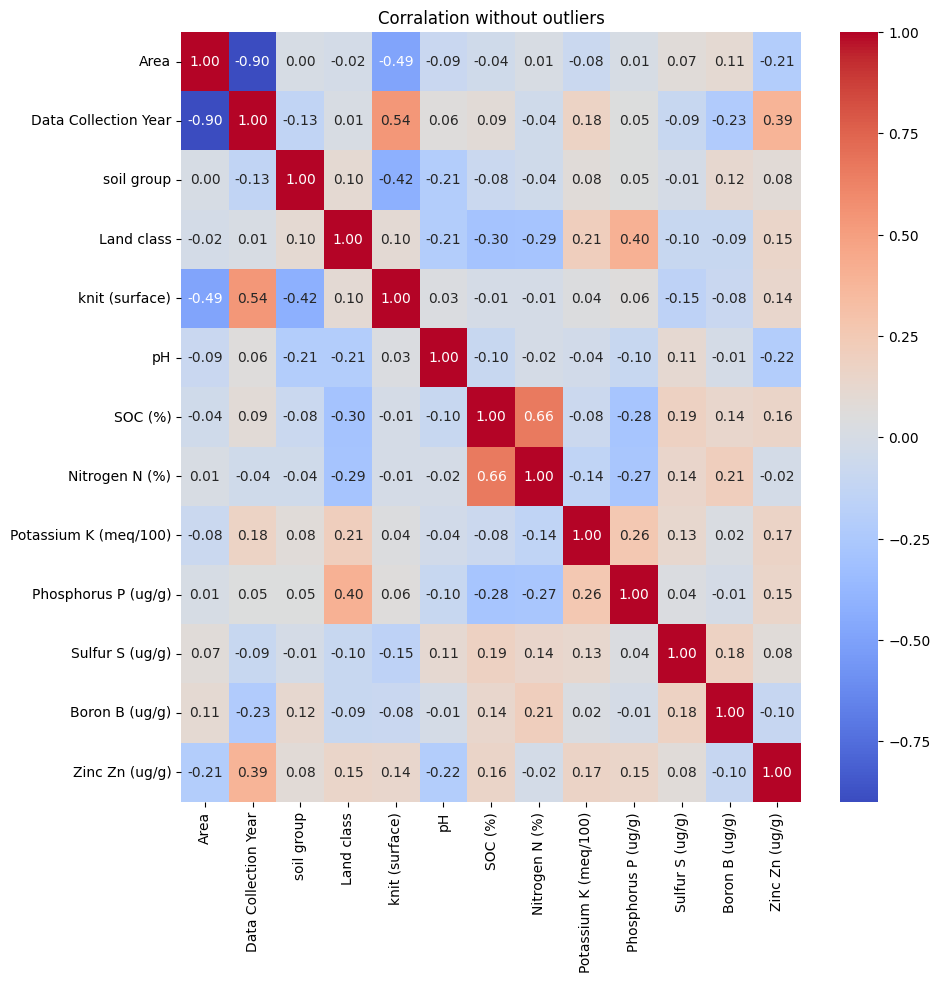

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Corralation without outliers")
plt.show()

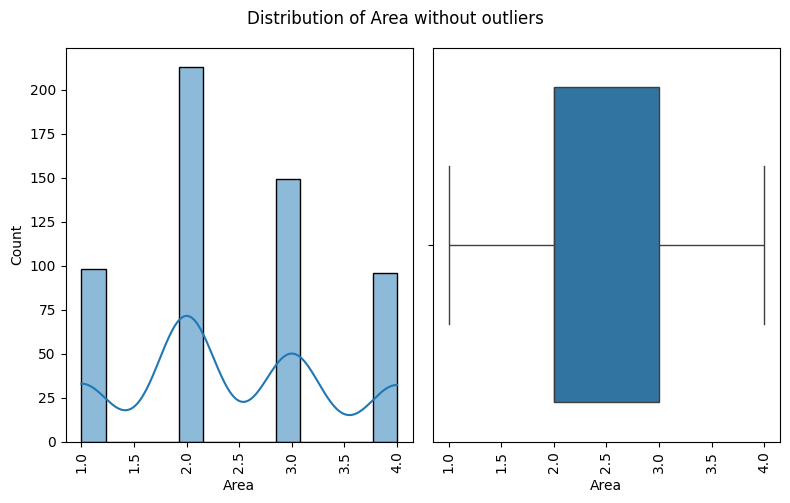

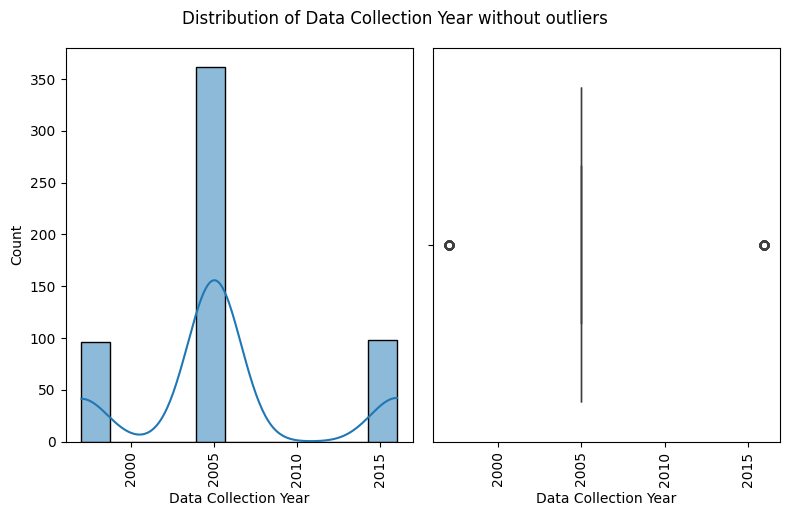

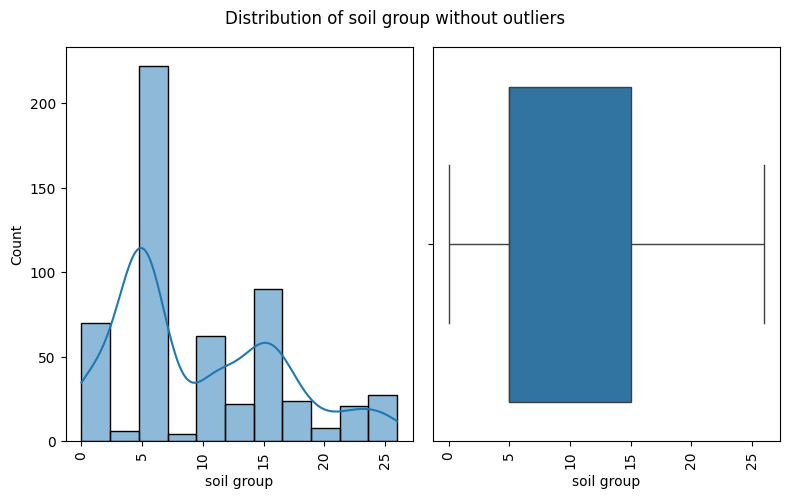

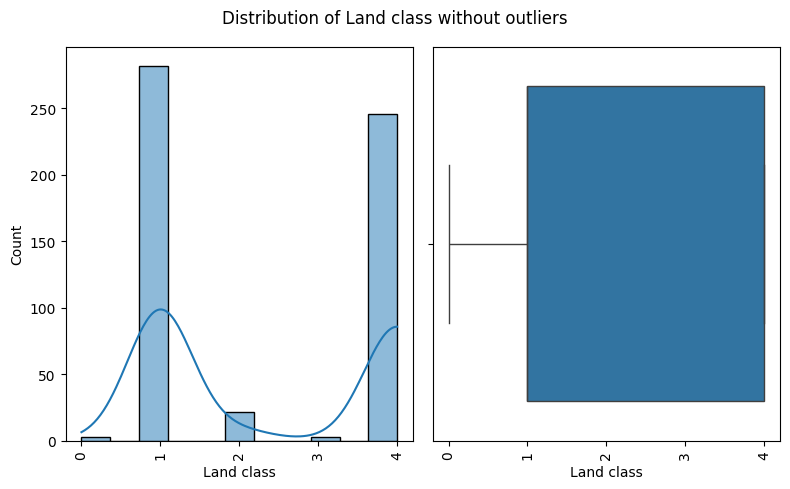

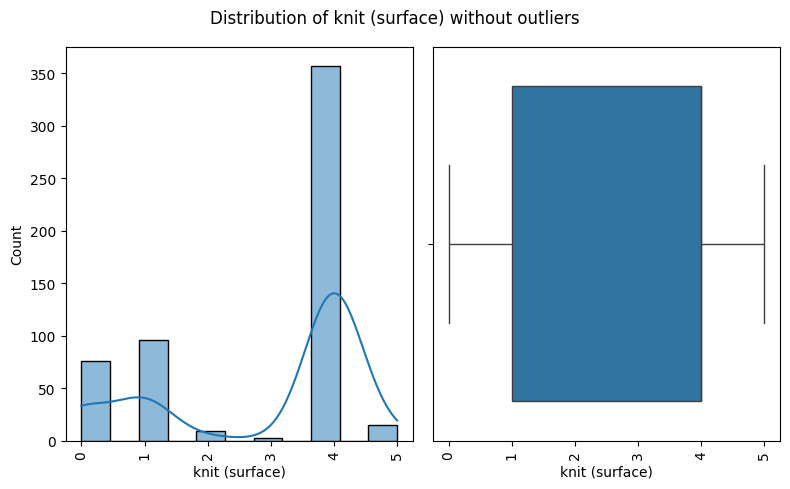

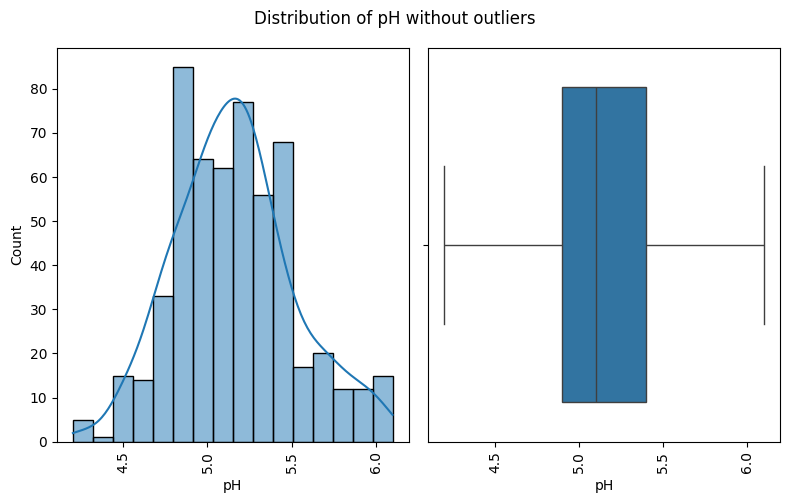

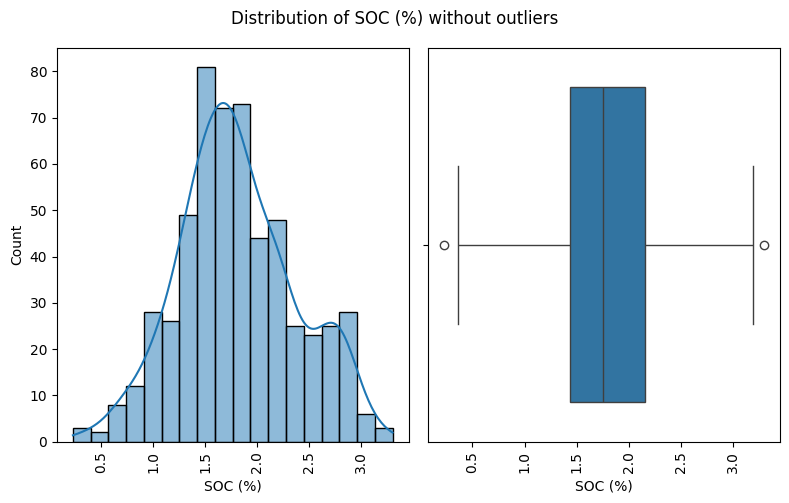

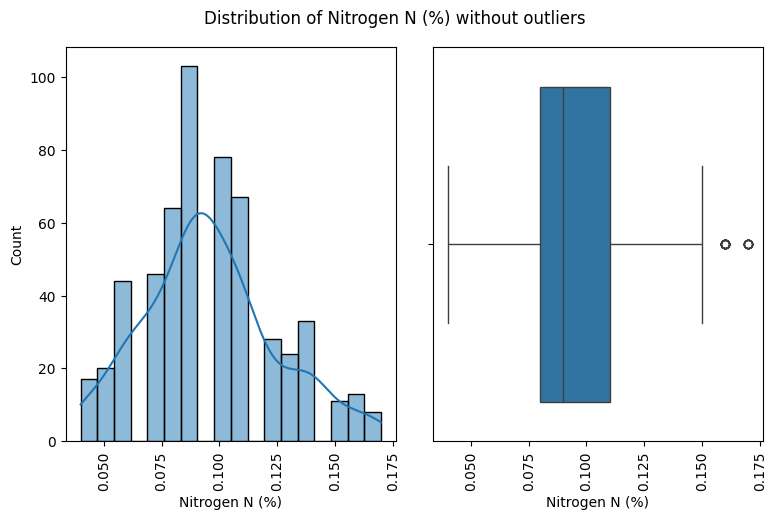

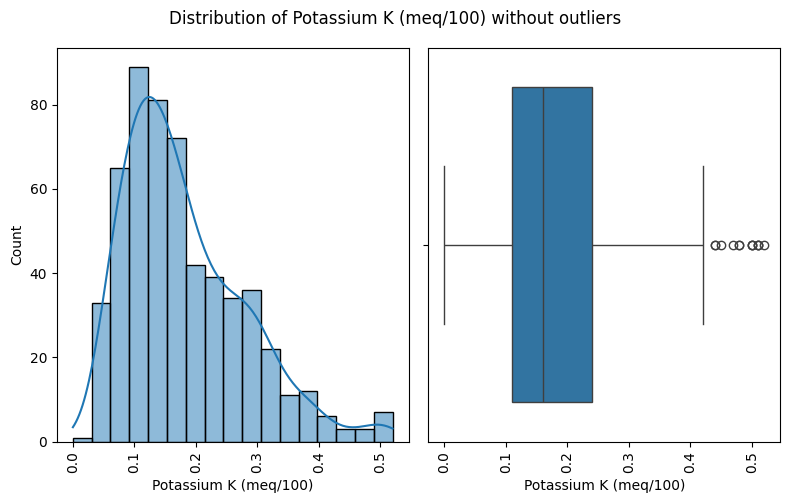

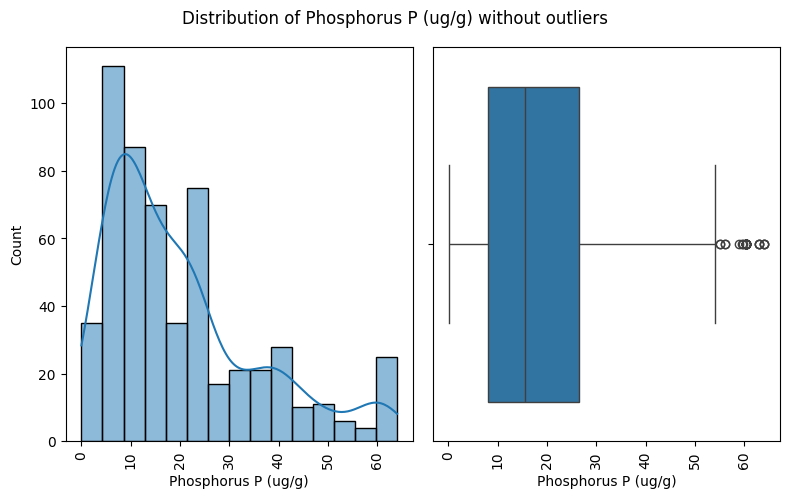

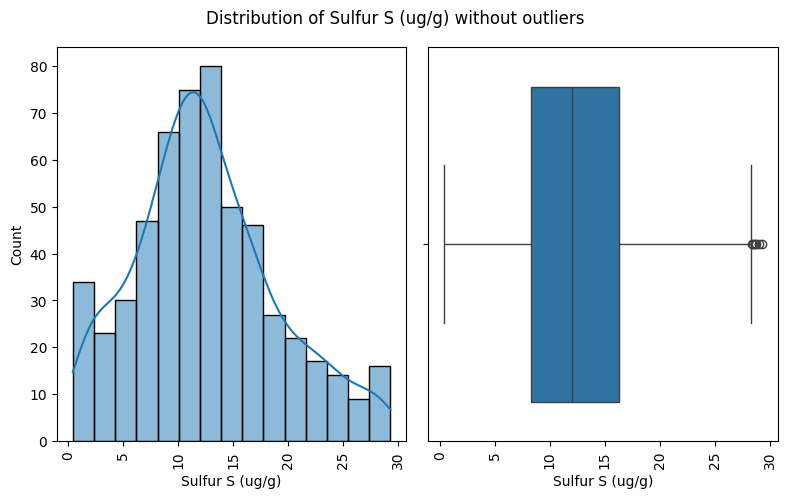

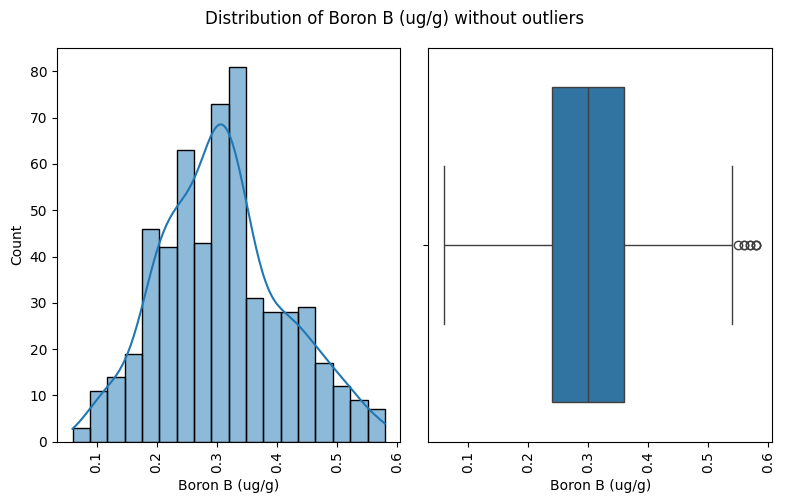

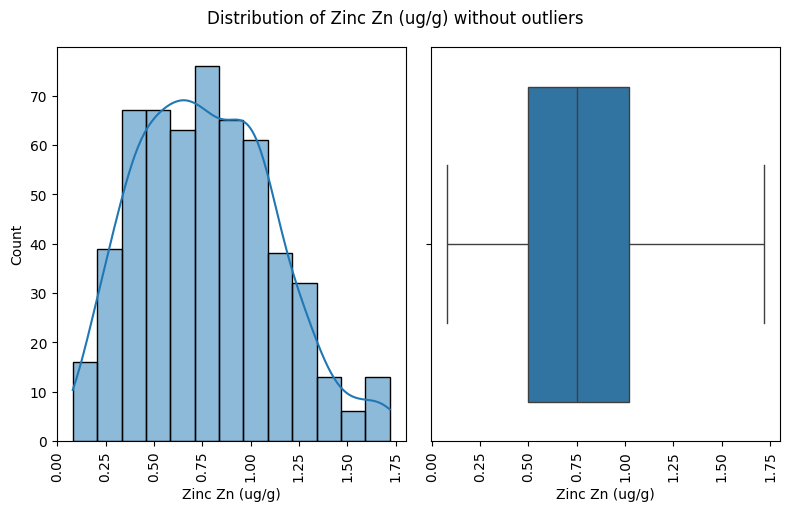

In [165]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 5))
    sns.histplot(df[col], ax=axes[0],kde=True)
    sns.boxplot(x=df[col], ax=axes[1])
    fig.suptitle(f"Distribution of {col} without outliers")
    plt.tight_layout()
    for ax in axes:
        ax.tick_params(axis='x', rotation=90)
    plt.show()
    print('\n')

In [14]:
df.columns

Index(['Area', 'Data Collection Year', 'soil group', 'Land class',
       'knit (surface)', 'pH', 'SOC (%)', 'Nitrogen N (%)',
       'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
       'Boron B (ug/g)', 'Zinc Zn (ug/g)'],
      dtype='object')

In [134]:
target = ['SOC (%)','Boron B (ug/g)', 'Zinc Zn (ug/g)']
features=df.drop(target,axis=1)
soil_features=['soil group', 'Land class','knit (surface)', 'pH','Nitrogen N (%)','Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)']

In [135]:
for i in df.columns[5:]:
    df[i] = df[i].apply(lambda x: format(x, '.3f'))

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_plot(df, cat_col, hue=None, palette='rocket'):

    order = df[cat_col].value_counts().index
    if not hue:
        hue = cat_col
    with sns.axes_style("darkgrid"):
        ax = sns.countplot(data=df,
                           y=cat_col,
                           order=order,
                           hue=hue if hue != cat_col else None,
                           palette=palette)
        for p in ax.patches:
            count = int(p.get_width())
            x_pos = p.get_x() + p.get_width() + 0.5
            y_pos = p.get_y() + p.get_height() / 2
            ax.text(x_pos, y_pos, count, ha='left', va='center')

        plt.title(f'Count Plot [{cat_col}]')
        plt.tight_layout()
        plt.show()

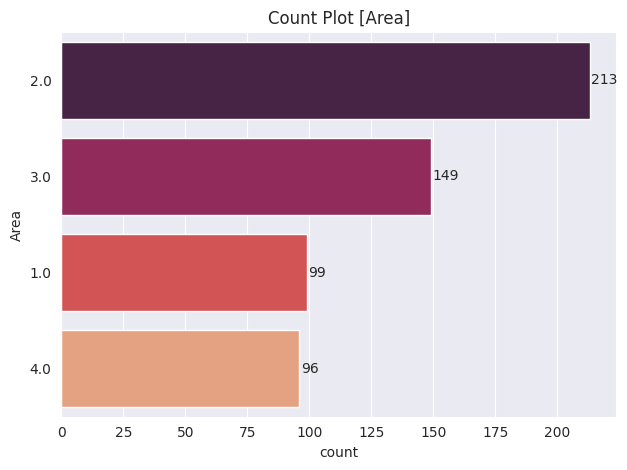

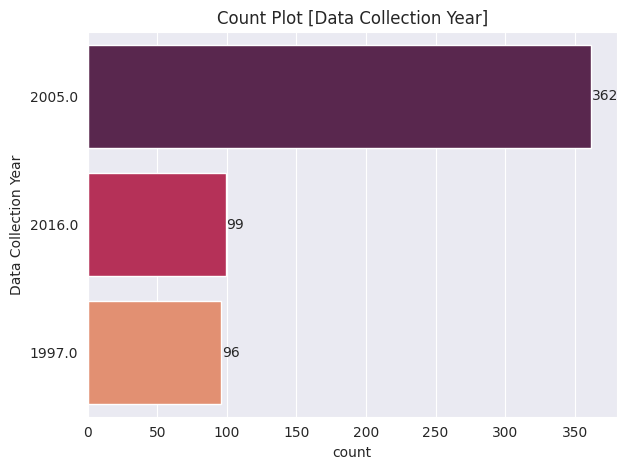

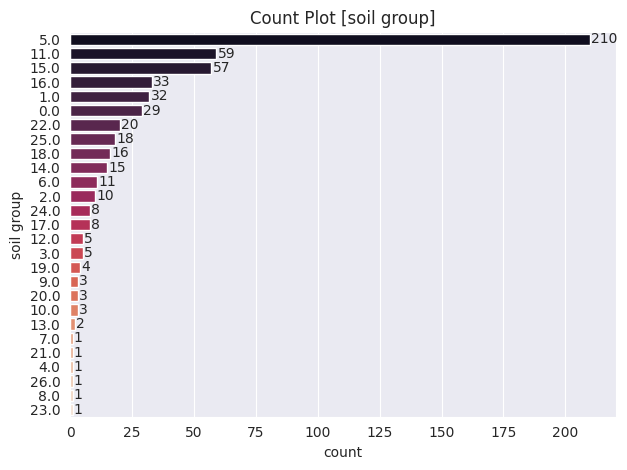

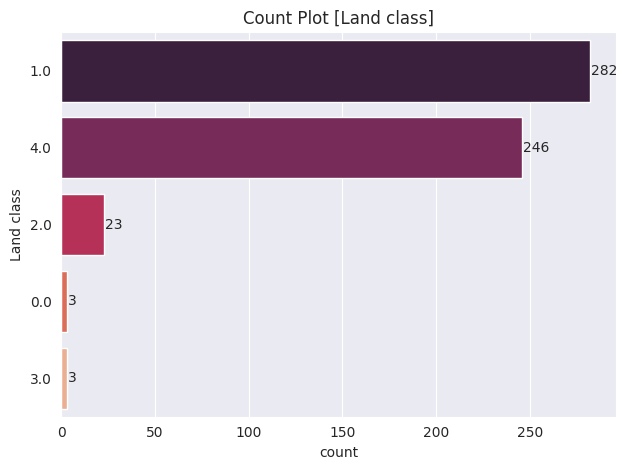

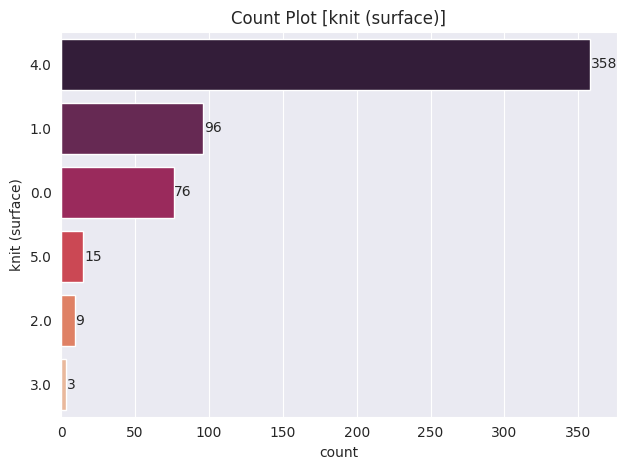

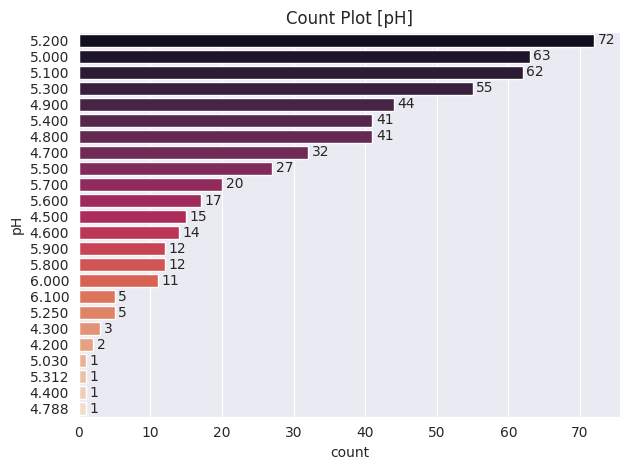

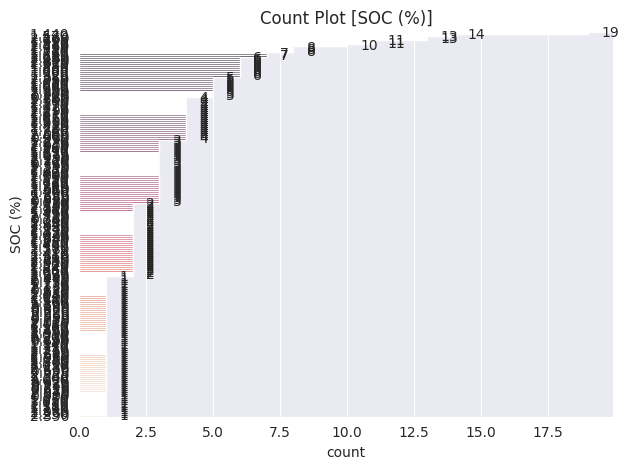

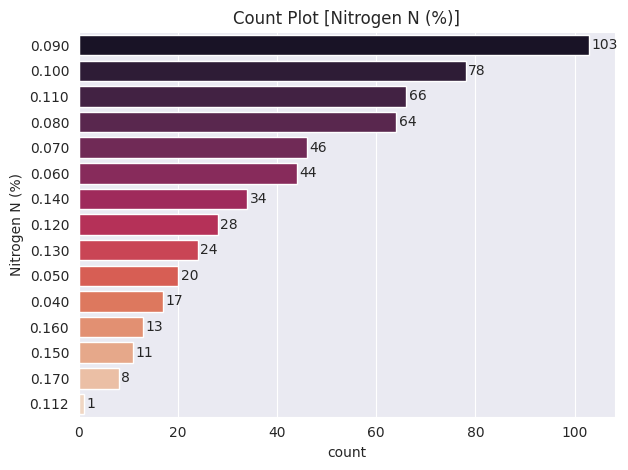

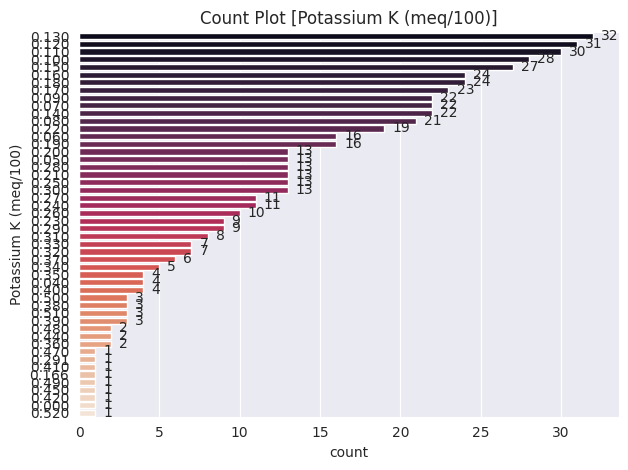

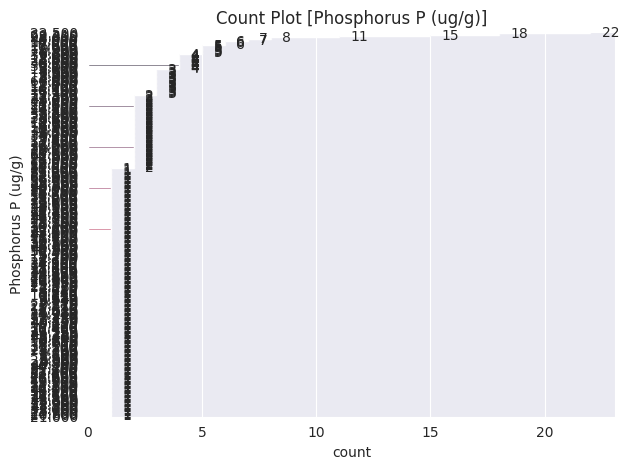

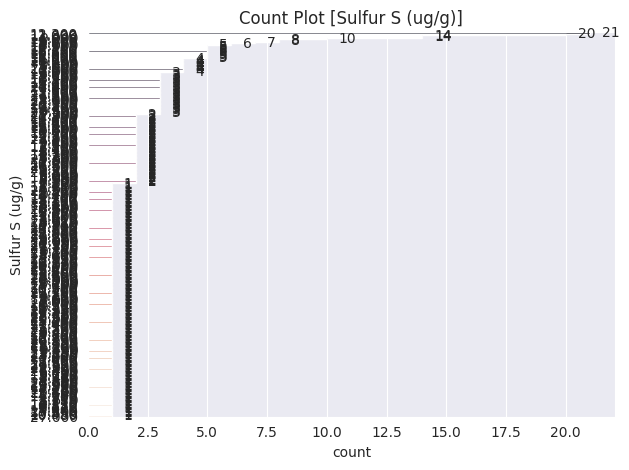

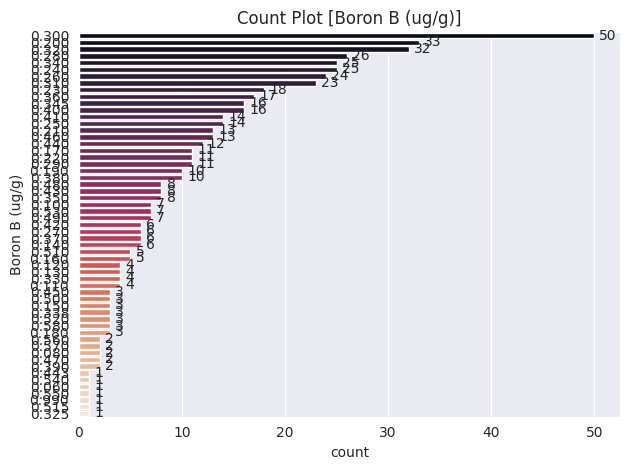

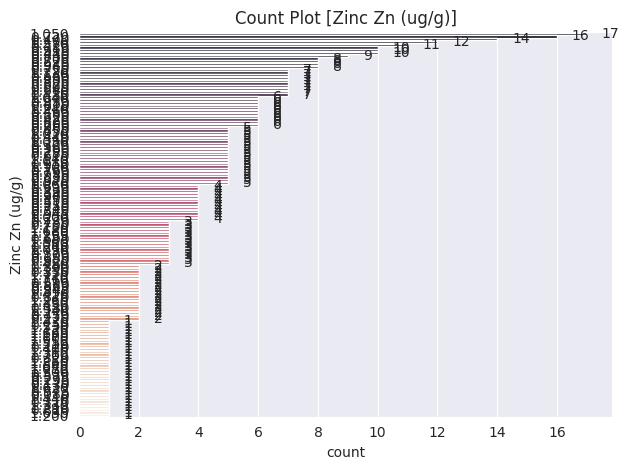

In [137]:
for i in df.columns:
    count_plot(df,i)
    print('\n')

In [140]:
for f in df.columns[4:]:
        print(f"Feature: {f}")
        print(f"Skewness: {df[f].skew():.4f}")
        print(f"Kurtosis: {df[f].kurtosis():.4f}")
        print(f"Mean: {df[f].mean():.4f}")
        print(f"Median: {df[f].median():.4f}")
        print(f"Mode: {df[f].mode().values[0]:.4f}")
        print("-" * 50)

Feature: knit (surface)
Skewness: -0.8300
Kurtosis: -1.0834
Mean: 2.9264
Median: 4.0000
Mode: 4.0000
--------------------------------------------------
Feature: pH
Skewness: 0.2997
Kurtosis: 0.0167
Mean: 5.1614
Median: 5.1000
Mode: 5.2000
--------------------------------------------------
Feature: SOC (%)
Skewness: 0.1839
Kurtosis: -0.2373
Mean: 1.8119
Median: 1.7600
Mode: 1.4400
--------------------------------------------------
Feature: Nitrogen N (%)
Skewness: 0.3690
Kurtosis: -0.1104
Mean: 0.0959
Median: 0.0900
Mode: 0.0900
--------------------------------------------------
Feature: Potassium K (meq/100)
Skewness: 1.0233
Kurtosis: 0.8396
Mean: 0.1821
Median: 0.1600
Mode: 0.1300
--------------------------------------------------
Feature: Phosphorus P (ug/g)
Skewness: 1.1399
Kurtosis: 0.5217
Mean: 20.2310
Median: 15.5000
Mode: 22.5000
--------------------------------------------------
Feature: Sulfur S (ug/g)
Skewness: 0.4478
Kurtosis: -0.1266
Mean: 12.5099
Median: 12.0000
Mode: 12.3

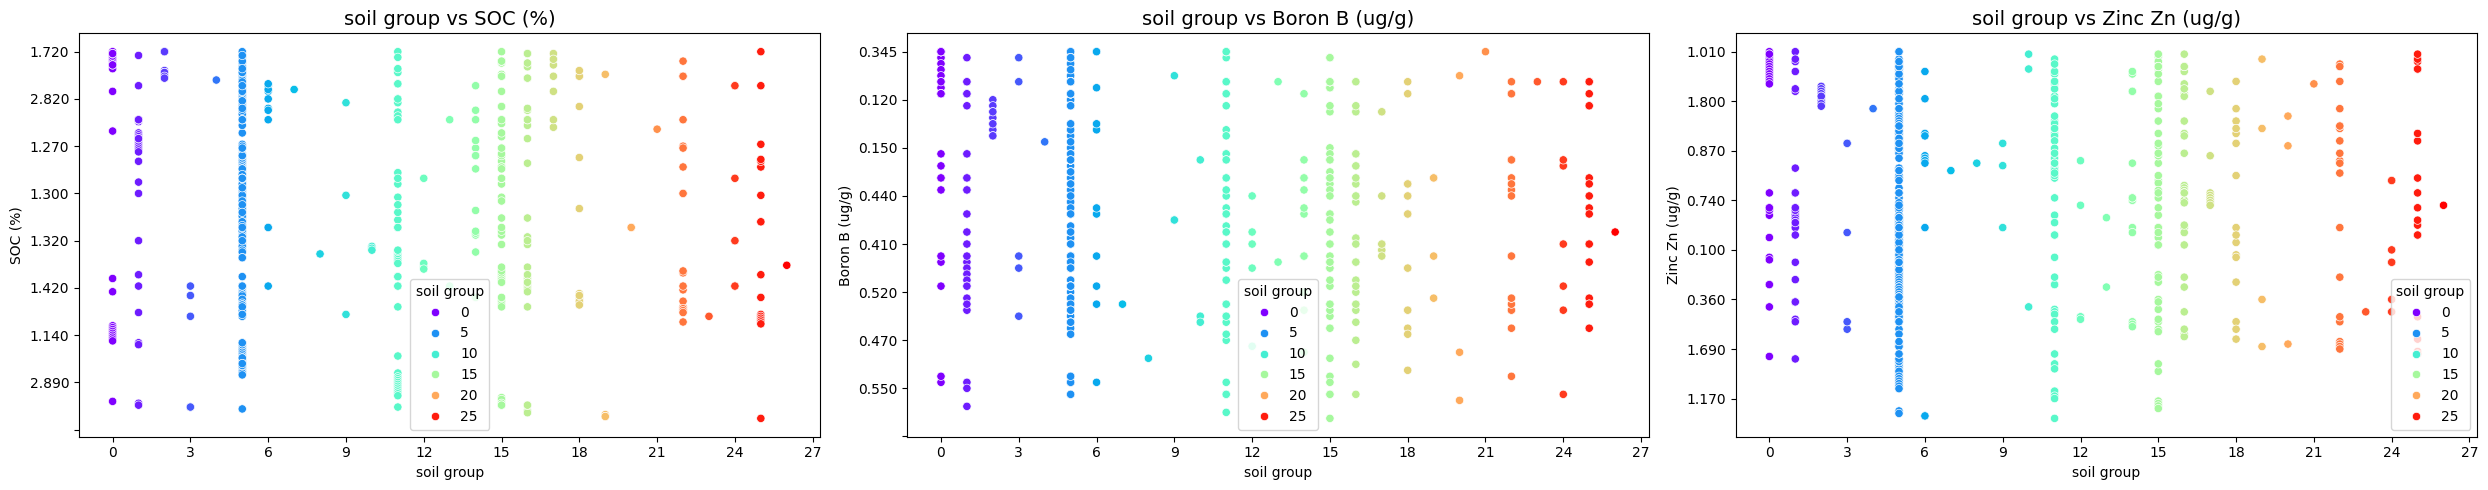

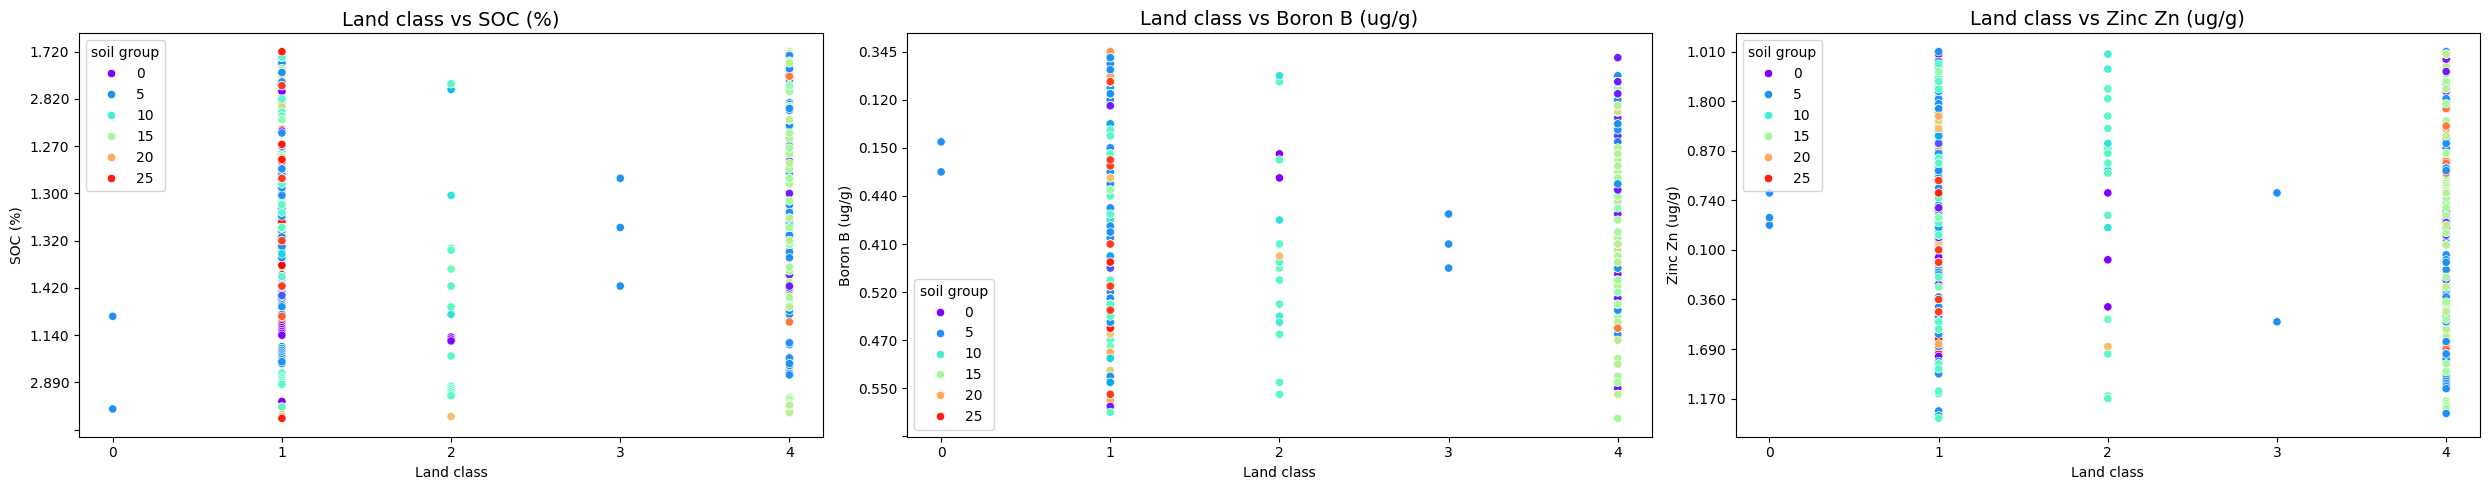

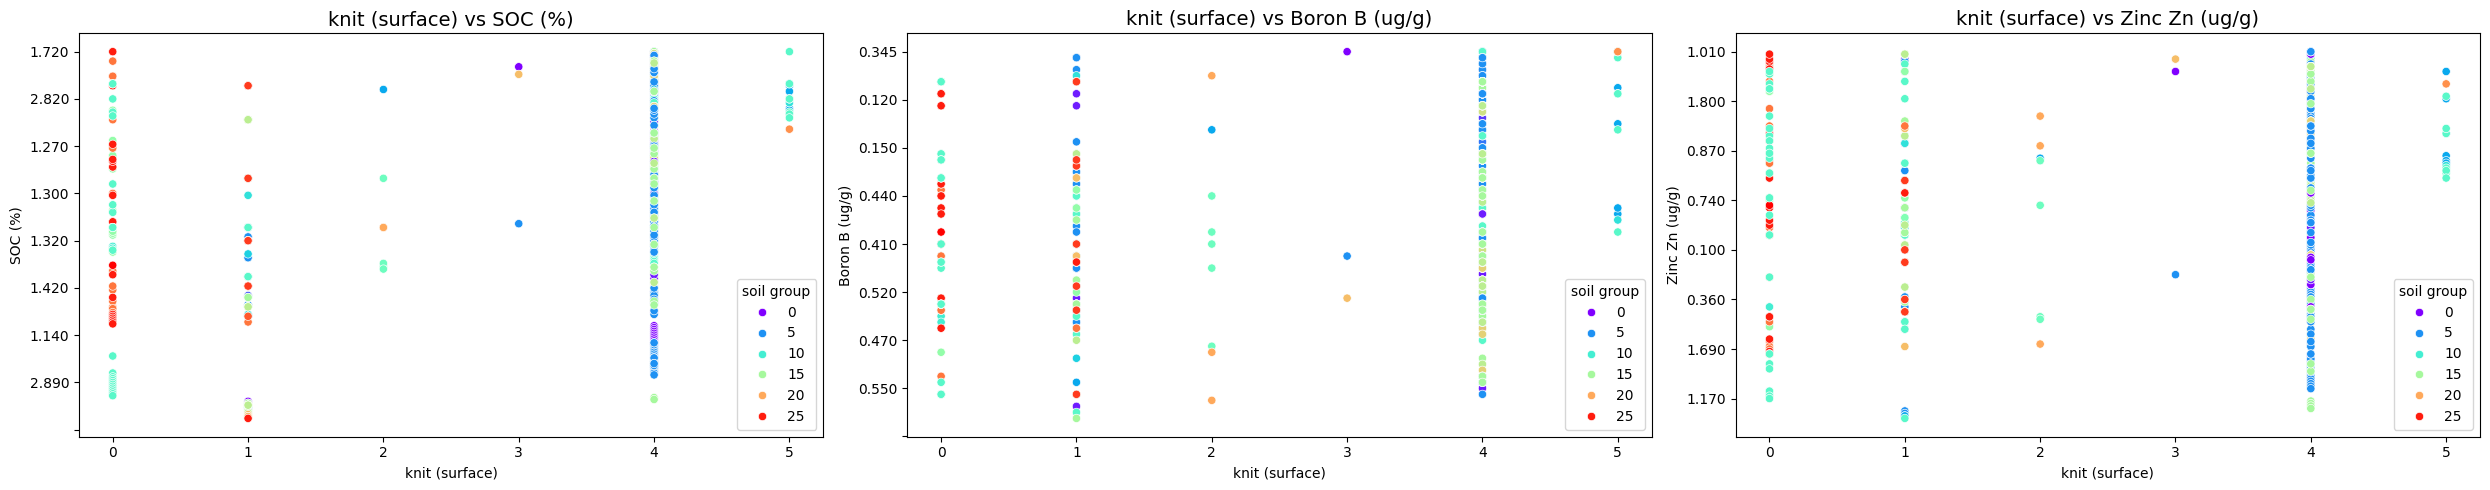

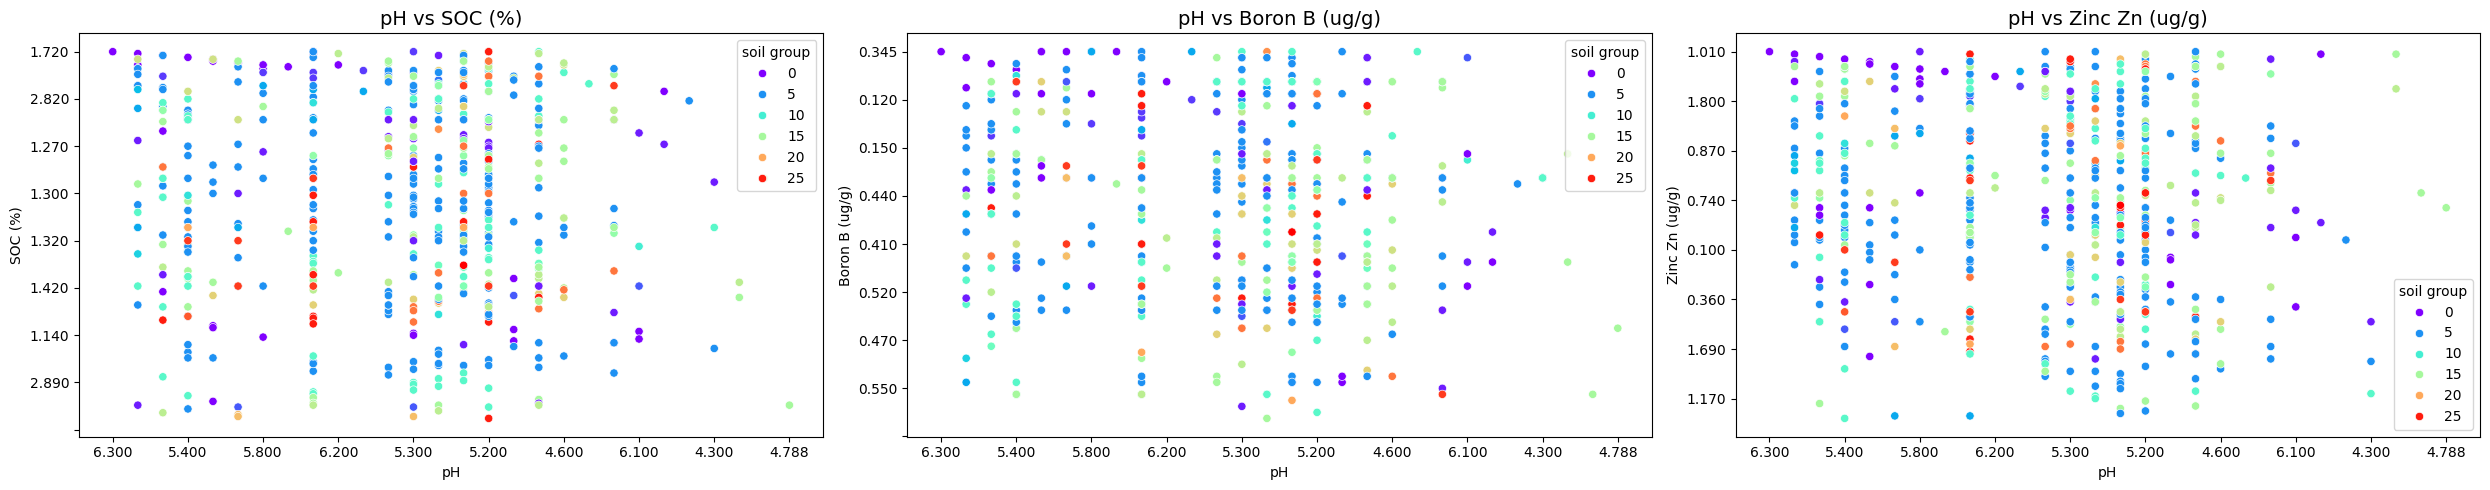

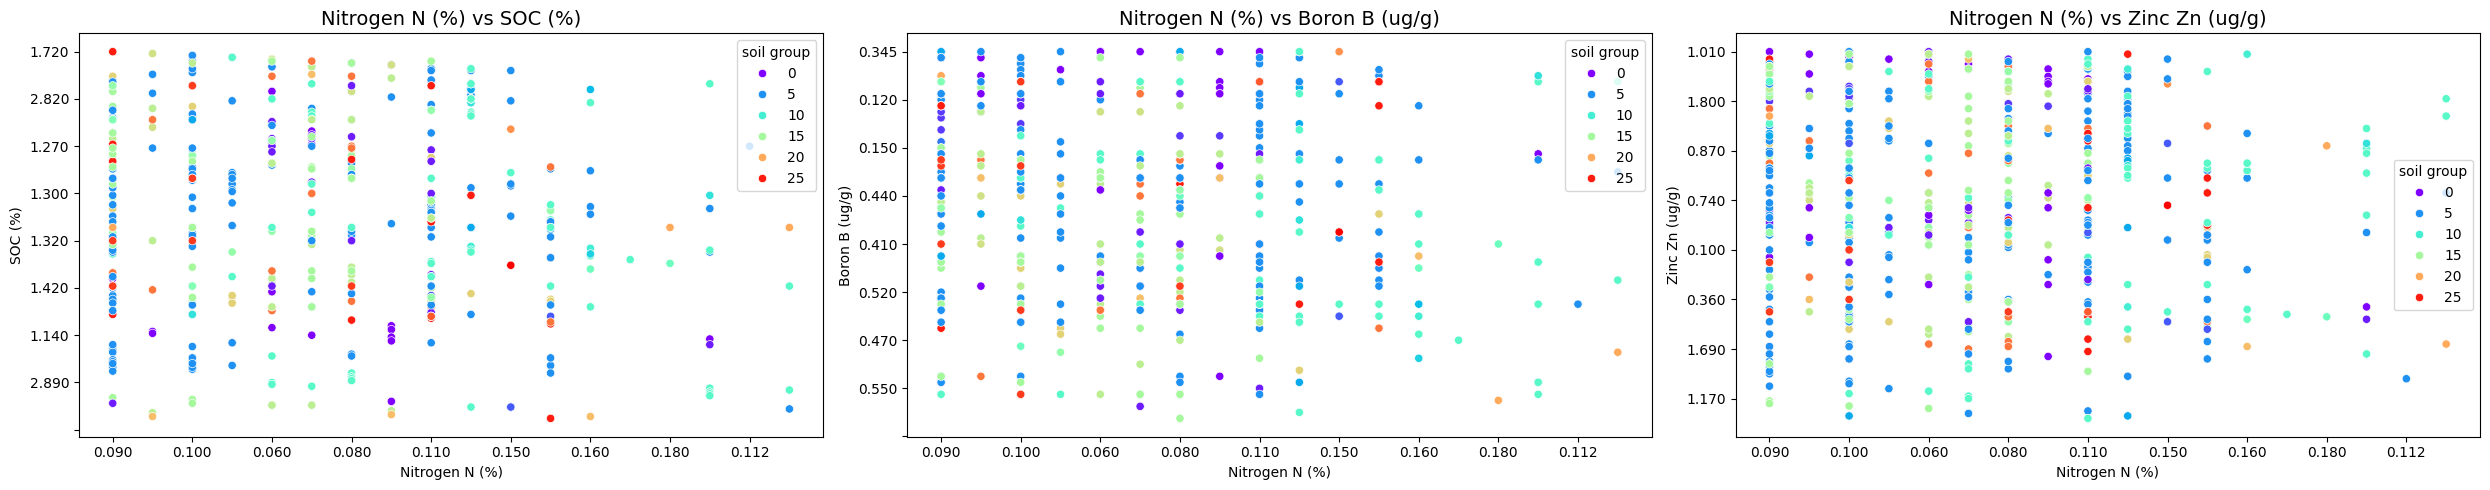

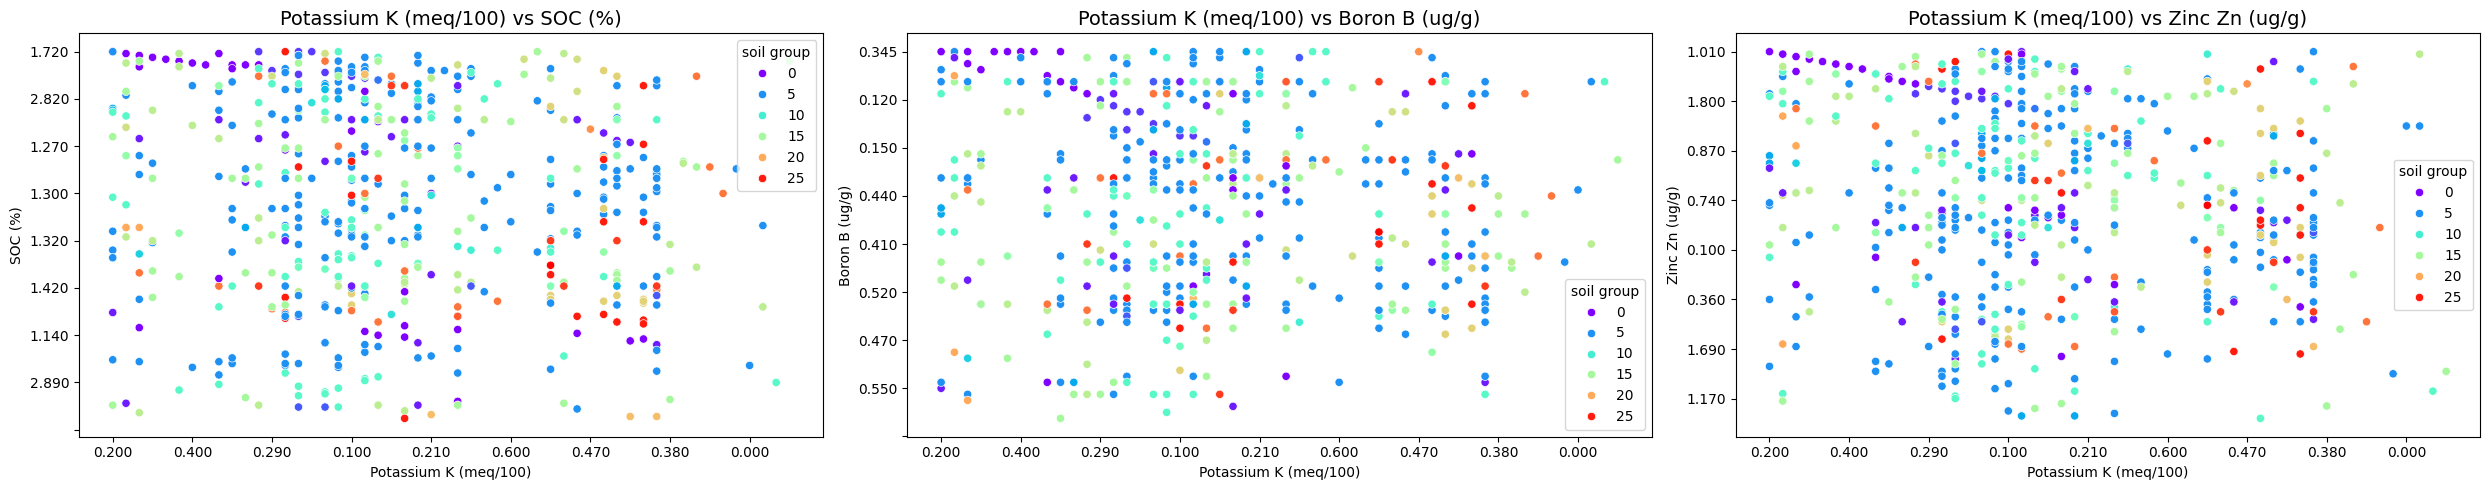

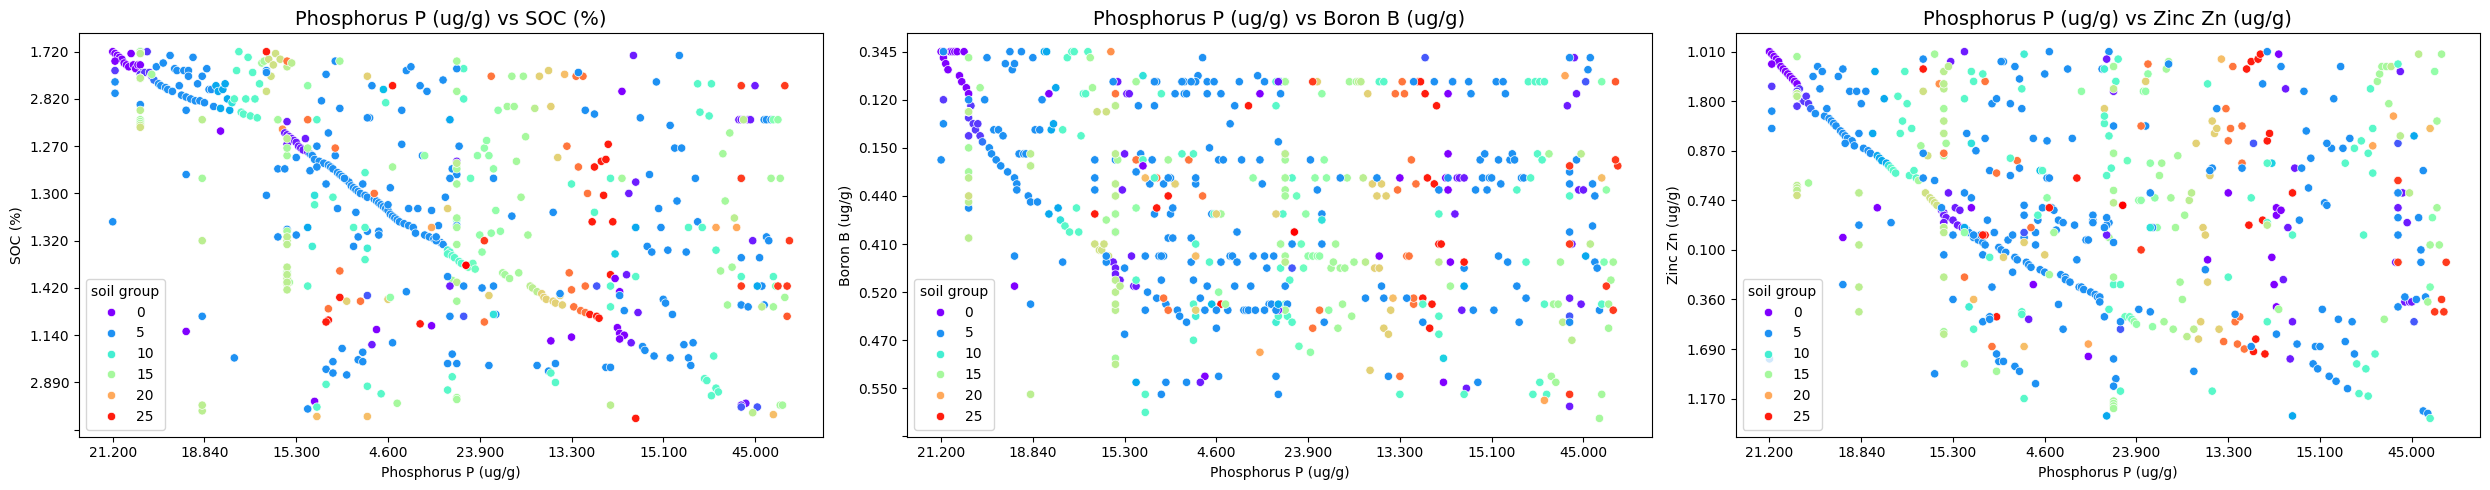

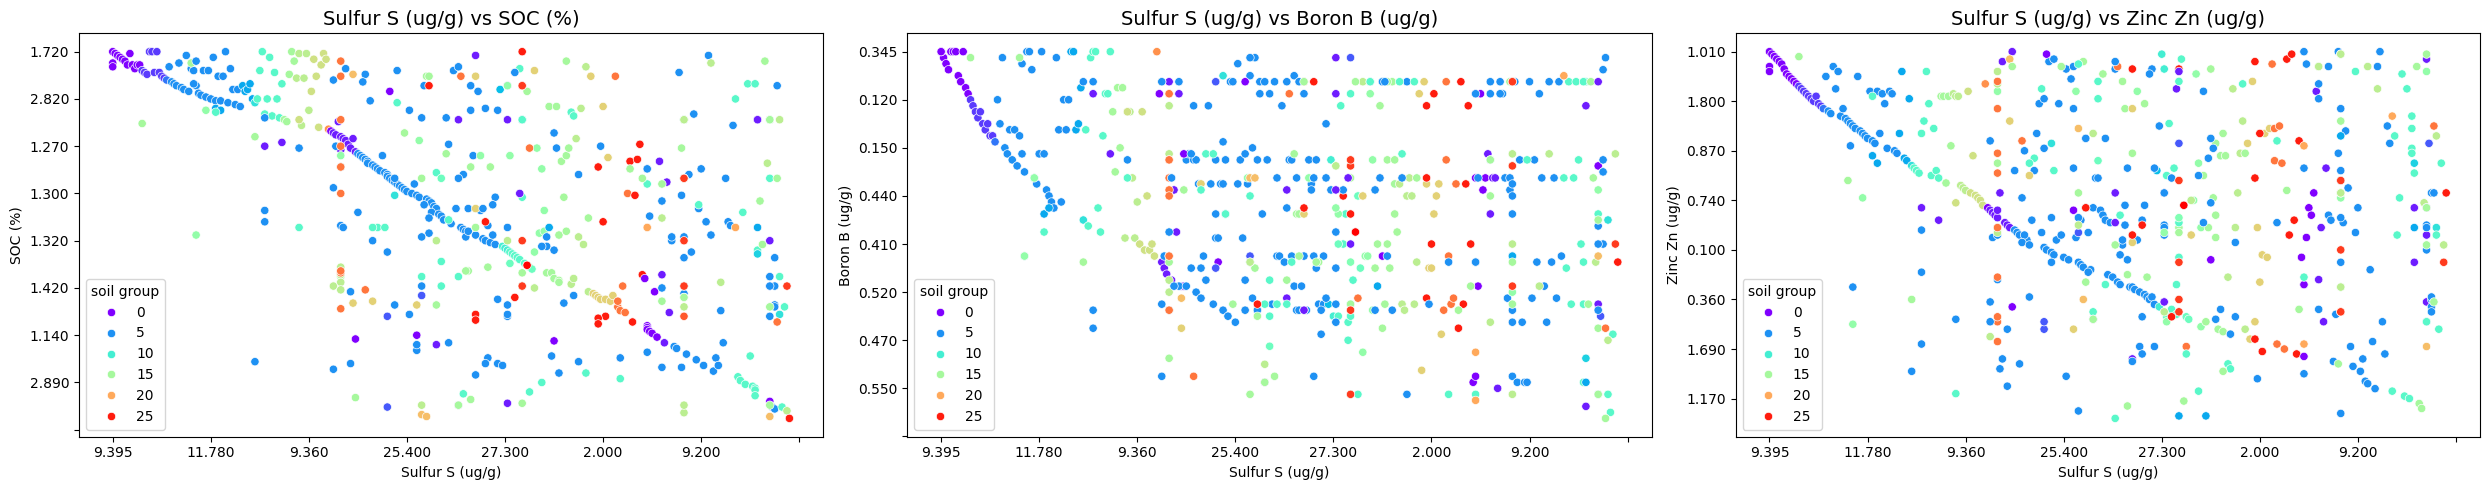

In [63]:
for col in soil_features:
    fig, axes = plt.subplots(1, len(target), figsize=(25, 5))
    titles = [f"{col} vs {t}" for t in target]  # Titles for subplots

    for i, ax in enumerate(axes):
        sns.scatterplot(x=df[col], y=df[target[i]], ax=ax , hue = df['soil group'],palette='rainbow')
        ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel(target[i])
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))


    plt.tight_layout()
    plt.show()
    print('\n')

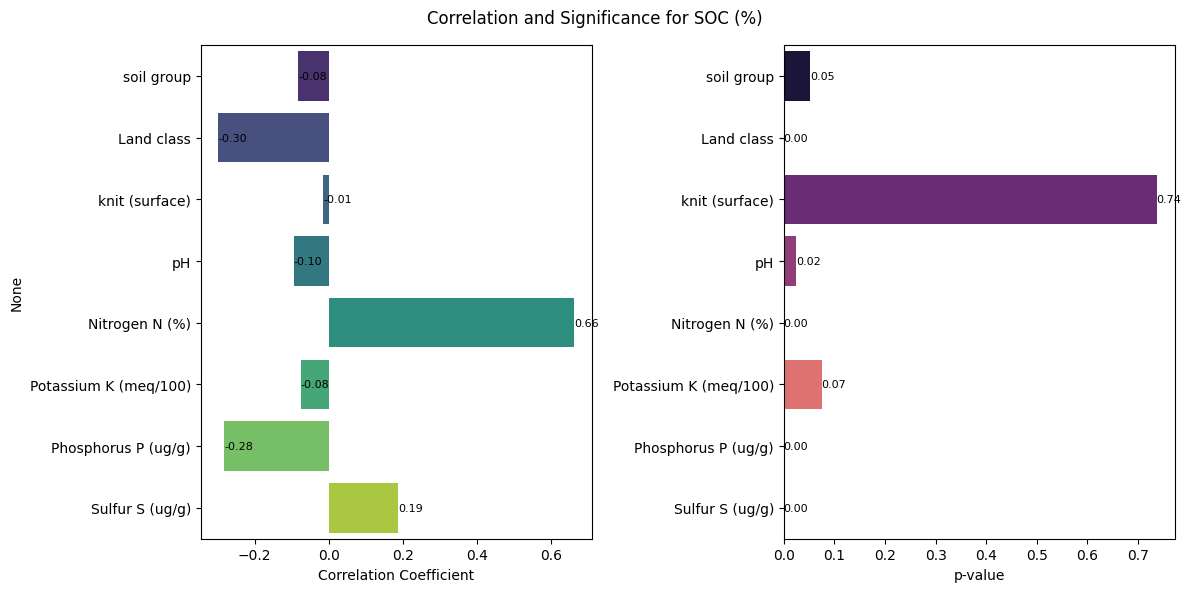

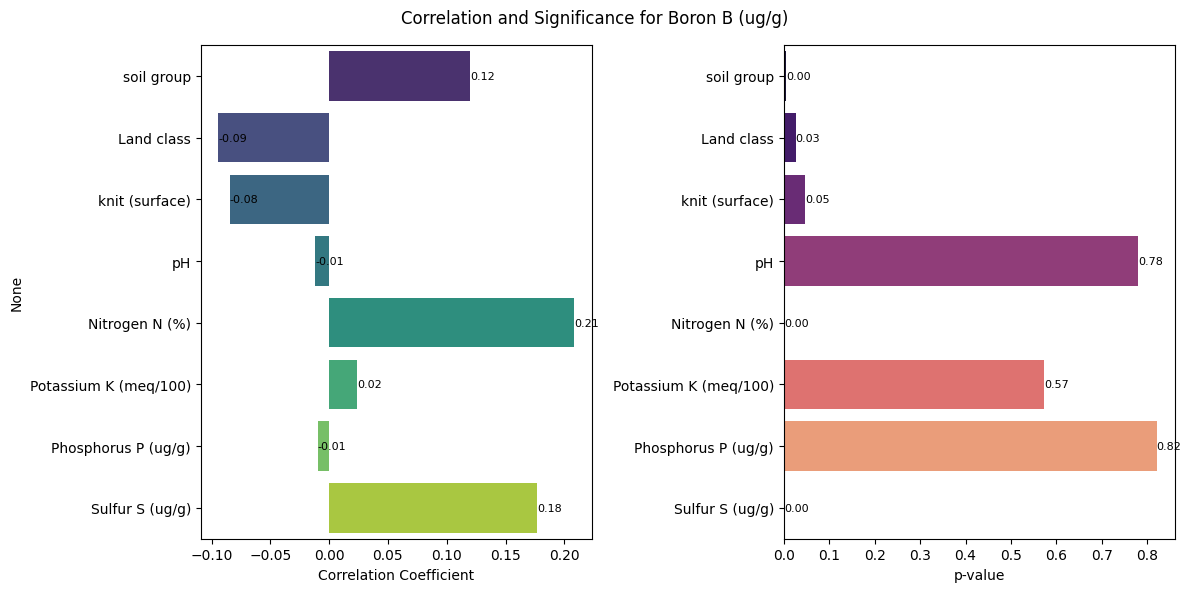

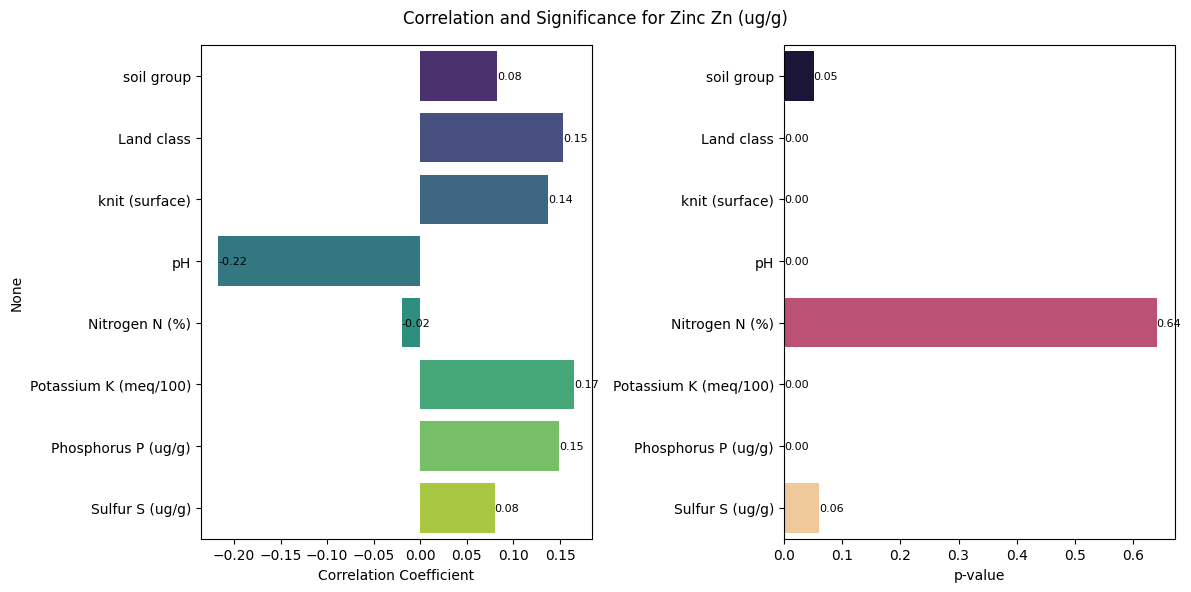

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

for t in target:
    corr_values = df[soil_features + [t]].corr()[t]
    p_values = [pearsonr(df[feature], df[t])[1] for feature in soil_features]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(y=corr_values.index[:-1], x=corr_values.values[:-1], palette='viridis', ax=ax1)
    for i, value in enumerate(corr_values.values[:-1]):
        ax1.text(value, i, f'{value:.2f}', va='center', fontsize=8)

    sns.barplot(y=soil_features, x=p_values, palette='magma', ax=ax2)
    for i, value in enumerate(p_values):
        ax2.text(value, i, f'{value:.2f}', va='center', fontsize=8)
    plt.suptitle(f'Correlation and Significance for {t}', fontsize=12)
    ax1.set_xlabel('Correlation Coefficient')
    ax2.set_xlabel('p-value')
    plt.tight_layout()
    plt.show()
    print('\n')


In [157]:
import pandas as pd
from scipy.stats import pearsonr

# Initialize an empty list to collect the data
table_data = []

# Loop through each target and calculate correlation and p-values
for t in target:
    corr_values = df[soil_features + [t]].corr()[t]
    p_values = [pearsonr(df[feature], df[t])[1] for feature in soil_features]

    # Add correlation values row
    table_data.append([t, 'corr'] + [f'{value:.3f}' for value in corr_values.values[:-1]])

    # Add p-values row
    table_data.append([t, 'p-value'] + [f'{value:.4f}' for value in p_values])

# Create a DataFrame with columns for correlation and p-value for each element
table_df = pd.DataFrame(table_data, columns=['Target', 'Element'] + soil_features)

# Display the table
table_df

Target  Element soil group Land class knit (surface)      pH  \
0         SOC (%)     corr     -0.082     -0.297         -0.014  -0.095   
1         SOC (%)  p-value     0.0524     0.0000         0.7366  0.0248   
2  Boron B (ug/g)     corr      0.120     -0.094         -0.084  -0.012   
3  Boron B (ug/g)  p-value     0.0046     0.0263         0.0464  0.7789   
4  Zinc Zn (ug/g)     corr      0.083      0.153          0.137  -0.217   
5  Zinc Zn (ug/g)  p-value     0.0513     0.0003         0.0012  0.0000   

  Nitrogen N (%) Potassium K (meq/100) Phosphorus P (ug/g) Sulfur S (ug/g)  
0          0.662                -0.076              -0.282           0.187  
1         0.0000                0.0749              0.0000          0.0000  
2          0.209                 0.024              -0.010           0.177  
3         0.0000                0.5725              0.8204          0.0000  
4         -0.020                 0.165               0.149           0.080  
5         0.6405                0.0001              0.0004          0.0600

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 60 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   557 non-null    float64
 1   Data Collection Year   557 non-null    float64
 2   soil group             557 non-null    float64
 3   Land class             557 non-null    float64
 4   knit (surface)         557 non-null    float64
 5   pH                     557 non-null    float64
 6   SOC (%)                557 non-null    float64
 7   Nitrogen N (%)         557 non-null    float64
 8   Potassium K (meq/100)  557 non-null    float64
 9   Phosphorus P (ug/g)    557 non-null    float64
 10  Sulfur S (ug/g)        557 non-null    float64
 11  Boron B (ug/g)         557 non-null    float64
 12  Zinc Zn (ug/g)         557 non-null    float64
dtypes: float64(13)
memory usage: 60.9 KB


In [166]:
df.to_csv("Preprocessed.csv", index=False)

In [167]:
df.describe().T

count         mean        std      min      25%  \
Area                   556.0     2.437050   0.972409     1.00     2.00   
Data Collection Year   556.0  2005.557554   5.667858  1997.00  2005.00   
soil group             556.0     9.530576   6.800435     0.00     5.00   
Land class             556.0     2.372302   1.472837     0.00     1.00   
knit (surface)         556.0     2.924460   1.638956     0.00     1.00   
pH                     556.0     5.159856   0.358771     4.20     4.90   
SOC (%)                556.0     1.809942   0.560554     0.23     1.44   
Nitrogen N (%)         556.0     0.095849   0.028638     0.04     0.08   
Potassium K (meq/100)  556.0     0.181577   0.097745     0.00     0.11   
Phosphorus P (ug/g)    556.0    20.194392  15.424684     0.06     8.10   
Sulfur S (ug/g)        556.0    12.513133   6.437698     0.40     8.30   
Boron B (ug/g)         556.0     0.308520   0.102483     0.06     0.24   
Zinc Zn (ug/g)         556.0     0.771955   0.351437     0.08     0.50   

                            50%        75%      max  
Area                      2.000     3.0000     4.00  
Data Collection Year   2005.000  2005.0000  2016.00  
soil group                5.000    15.0000    26.00  
Land class                1.000     4.0000     4.00  
knit (surface)            4.000     4.0000     5.00  
pH                        5.100     5.4000     6.10  
SOC (%)                   1.755     2.1600     3.30  
Nitrogen N (%)            0.090     0.1100     0.17  
Potassium K (meq/100)     0.160     0.2400     0.52  
Phosphorus P (ug/g)      15.495    26.4700    64.00  
Sulfur S (ug/g)          12.000    16.3000    29.30  
Boron B (ug/g)            0.300     0.3600     0.58  
Zinc Zn (ug/g)            0.750     1.0225     1.72

In [168]:
df.shape

(556, 13)